In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('bmh')

# Exploratory Data Analysis


In [3]:
# Load the dataset
file_path = '/Users/jiawei/Downloads/MSM_532/Team_Project/heloc_dataset_v1.csv'
heloc_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
heloc_data.head()

RiskPerformance  ExternalRiskEstimate  MSinceOldestTradeOpen  \
0             Bad                    55                    144   
1             Bad                    61                     58   
2             Bad                    67                     66   
3             Bad                    66                    169   
4             Bad                    81                    333   

   MSinceMostRecentTradeOpen  AverageMInFile  NumSatisfactoryTrades  \
0                          4              84                     20   
1                         15              41                      2   
2                          5              24                      9   
3                          1              73                     28   
4                         27             132                     12   

   NumTrades60Ever2DerogPubRec  NumTrades90Ever2DerogPubRec  \
0                            3                            0   
1                            4                            4   
2                            0                            0   
3                            1                            1   
4                            0                            0   

   PercentTradesNeverDelq  MSinceMostRecentDelq  ...  PercentInstallTrades  \
0                      83                     2  ...                    43   
1                     100                    -7  ...                    67   
2                     100                    -7  ...                    44   
3                      93                    76  ...                    57   
4                     100                    -7  ...                    25   

   MSinceMostRecentInqexcl7days  NumInqLast6M  NumInqLast6Mexcl7days  \
0                             0             0                      0   
1                             0             0                      0   
2                             0             4                      4   
3                             0             5                      4   
4                             0             1                      1   

   NetFractionRevolvingBurden  NetFractionInstallBurden  \
0                          33                        -8   
1                           0                        -8   
2                          53                        66   
3                          72                        83   
4                          51                        89   

   NumRevolvingTradesWBalance  NumInstallTradesWBalance  \
0                           8                         1   
1                           0                        -8   
2                           4                         2   
3                           6                         4   
4                           3                         1   

   NumBank2NatlTradesWHighUtilization  PercentTradesWBalance  
0                                   1                     69  
1                                  -8                      0  
2                                   1                     86  
3                                   3                     91  
4                                   0                     80  

[5 rows x 24 columns]

In [4]:
heloc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10459 entries, 0 to 10458
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   RiskPerformance                     10459 non-null  object
 1   ExternalRiskEstimate                10459 non-null  int64 
 2   MSinceOldestTradeOpen               10459 non-null  int64 
 3   MSinceMostRecentTradeOpen           10459 non-null  int64 
 4   AverageMInFile                      10459 non-null  int64 
 5   NumSatisfactoryTrades               10459 non-null  int64 
 6   NumTrades60Ever2DerogPubRec         10459 non-null  int64 
 7   NumTrades90Ever2DerogPubRec         10459 non-null  int64 
 8   PercentTradesNeverDelq              10459 non-null  int64 
 9   MSinceMostRecentDelq                10459 non-null  int64 
 10  MaxDelq2PublicRecLast12M            10459 non-null  int64 
 11  MaxDelqEver                         10459 non-null  in

### Dataset
The dataset consists of 10459 rows and 24 columns. 
The target variable is "RiskPerformance", which has categorical values.
All other features are numerical.

### Data Types
- 1 categorical column
- 23 numerical columns

### Missing Values
No missing values in the dataset, meaning no immediate need for imputation.


## Checking Class Distribution

/var/folders/py/5404wjqs4cgbm7xh534cv8sw0000gn/T/ipykernel_86895/2727035231.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RiskPerformance', data=heloc_data, palette='viridis')


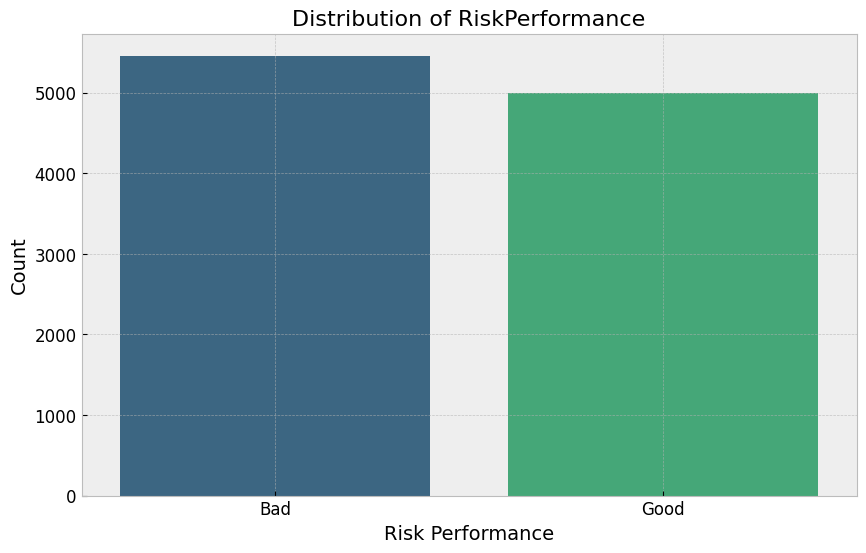

RiskPerformance
Bad     52.194282
Good    47.805718
Name: proportion, dtype: float64


In [5]:
# Plot the countplot with enhancements
plt.figure(figsize=(10, 6))
sns.countplot(x='RiskPerformance', data=heloc_data, palette='viridis')
plt.title('Distribution of RiskPerformance', fontsize=16)
plt.xlabel('Risk Performance', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Calculate and display the percentage distribution
risk_performance_percentage = heloc_data['RiskPerformance'].value_counts(normalize=True) * 100
print(risk_performance_percentage)

### Class distribution Analysis:
This dataset is fairly balanced, meaning that we don't have a severe class imbalance issue.

## Summary Statistics


In [6]:
# Generate summary statistics for numerical features
summary_statistics = heloc_data.describe()
# Display summary statistics in a more readable format
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print(summary_statistics)

       ExternalRiskEstimate  MSinceOldestTradeOpen  MSinceMostRecentTradeOpen  \
count              10459.00               10459.00                   10459.00   
mean                  67.43                 184.21                       8.54   
std                   21.12                 109.68                      13.30   
min                   -9.00                  -9.00                      -9.00   
25%                   63.00                 118.00                       3.00   
50%                   71.00                 178.00                       5.00   
75%                   79.00                 249.50                      11.00   
max                   94.00                 803.00                     383.00   

       AverageMInFile  NumSatisfactoryTrades  NumTrades60Ever2DerogPubRec  \
count        10459.00               10459.00                     10459.00   
mean            73.84                  19.43                         0.04   
std             38.78                  

### Summary Statistics Insights:
Several features have negative values (e.g., ExternalRiskEstimate, MSinceOldestTradeOpen, PercentTradesNeverDelq, etc.). These may be placeholders for missing or special cases that need interpretation

The dataset contains a mix of continuous and categorical numerical features

High variance is observed in some features, which might suggest outliers

## Numerical Data Analysis 

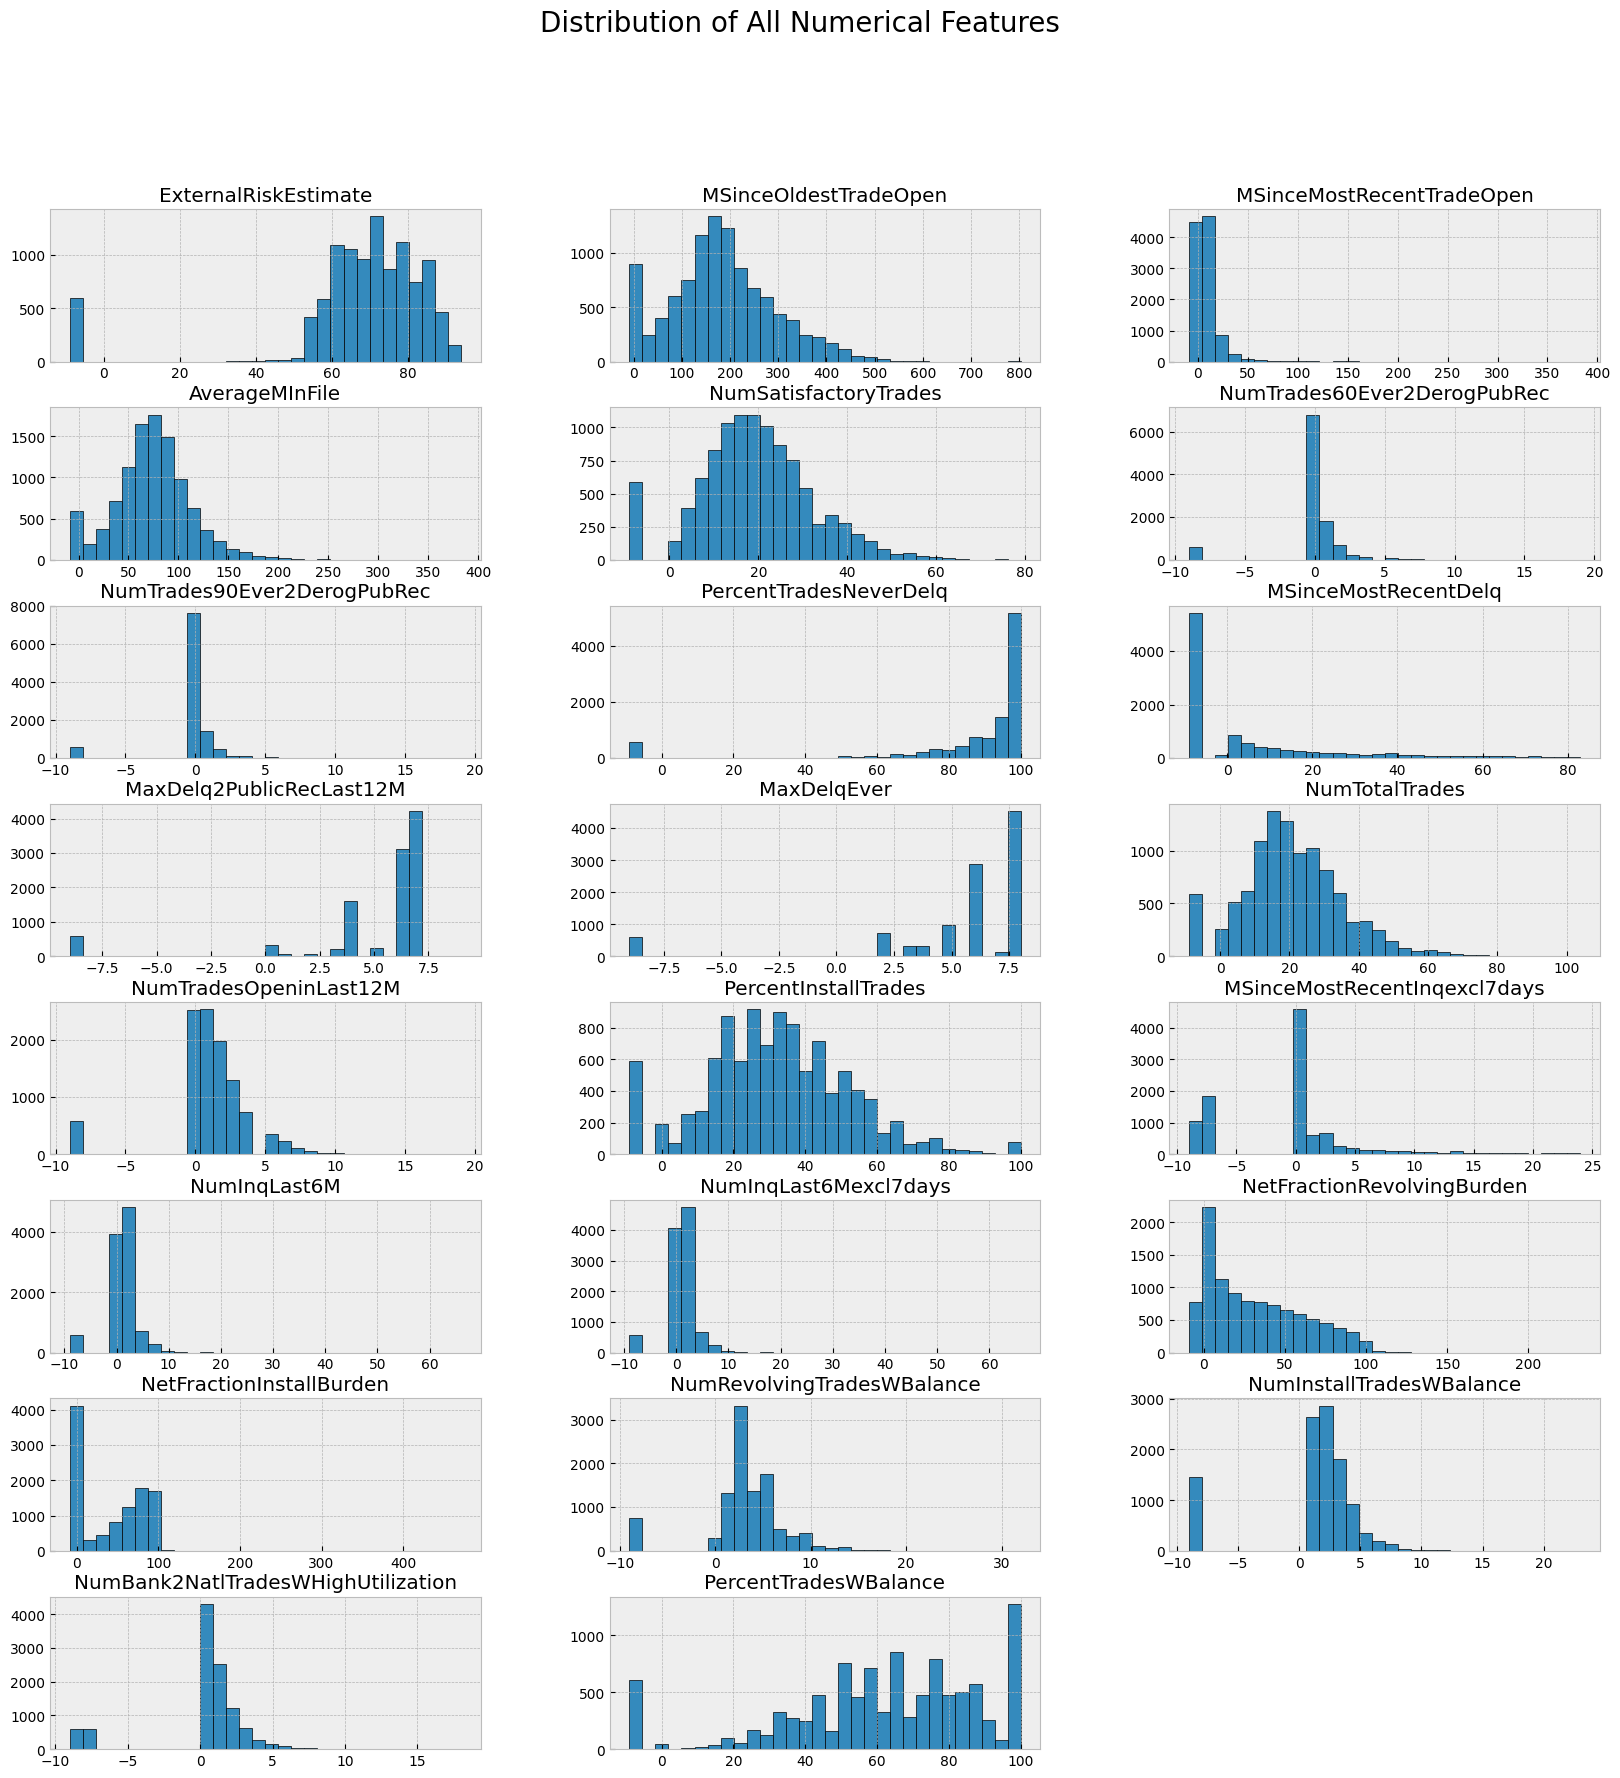

In [7]:
# Plot the distribution of all numerical features
heloc_data.hist(figsize=(20, 20), bins=30, layout=(8, 3), edgecolor='black')
plt.suptitle('Distribution of All Numerical Features', fontsize=20)
plt.show()

### Feature Distribution Insights:

- 1. Skewness & Outliers:
 	Several features show right-skewed distributions, indicating possible outliers.
    Features such as NumTrades60Ever2DerogPubRec, NumTrades90Ever2DerogPubRec, NumInqLast6M have a high concentration of zero values.
- 2. Negative Values:
    Some features contain negative values, which might represent missing or undefined values
- 3. Binary/Discrete Distributions:
    Some variables, like MaxDelq2PublicRecLast12M and MaxDelqEver, have distinct groupings, suggesting categorical nature




### Missing Value

Since this dataset represent null value by negative number, we should firstly handle the missing value, nagative number will influence the correlation

### -9: No Bureau Record or No Investigation

**Business Meaning:**
No Credit Record or No Investigation of Credit Report by the Bank.

**Possible Scenarios:**
- The applicant has never used any credit products (credit cards, loans, etc.), and therefore the credit bureaus do not have their data.
- The applicant may be a new immigrant or a young person without sufficient credit history.
- The lender has not inquired about the person's credit information from the credit bureaus.

**Business Interpretation by Banks:**
- Higher risk: Because the bank cannot judge the applicant's repayment behavior, the lack of credit history is an uncertain factor.
- Likely to refuse a loan: Traditional banks, in particular, may be more inclined to refuse an applicant with no credit history.


In [8]:
# Find columns with value -9
columns_with_minus_9 = heloc_data.columns[(heloc_data == -9).any()].tolist()
print("Columns with value -9:", columns_with_minus_9)

# Count the total number of rows with -9 values
total_rows_with_minus_9 = (heloc_data == -9).any(axis=1).sum()
print("Total number of rows with -9 values:", total_rows_with_minus_9)

# Exclude the first column (categorical variable) when checking for -9 values
all_minus_9 = heloc_data.iloc[:, 1:].isin([-9]).all(axis=1)

print("Is there any row where all values are -9 (excluding the first column):", all_minus_9.any())

# Calculate the percentage of rows with -8 values that correspond to each RiskPerformance category
risk_performance_minus_9 = heloc_data.loc[(heloc_data == -9).any(axis=1), 'RiskPerformance']
percentage_risk_performance_minus_9 = risk_performance_minus_9.value_counts(normalize=True) * 100

print("Bad: {:.2f}%".format(percentage_risk_performance_minus_9.get(0, 0)))
print("Good: {:.2f}%".format(percentage_risk_performance_minus_9.get(1, 0)))

Columns with value -9: ['ExternalRiskEstimate', 'MSinceOldestTradeOpen', 'MSinceMostRecentTradeOpen', 'AverageMInFile', 'NumSatisfactoryTrades', 'NumTrades60Ever2DerogPubRec', 'NumTrades90Ever2DerogPubRec', 'PercentTradesNeverDelq', 'MSinceMostRecentDelq', 'MaxDelq2PublicRecLast12M', 'MaxDelqEver', 'NumTotalTrades', 'NumTradesOpeninLast12M', 'PercentInstallTrades', 'MSinceMostRecentInqexcl7days', 'NumInqLast6M', 'NumInqLast6Mexcl7days', 'NetFractionRevolvingBurden', 'NetFractionInstallBurden', 'NumRevolvingTradesWBalance', 'NumInstallTradesWBalance', 'NumBank2NatlTradesWHighUtilization', 'PercentTradesWBalance']
Total number of rows with -9 values: 598
Is there any row where all values are -9 (excluding the first column): True
Bad: 55.35%
Good: 44.65%


/var/folders/py/5404wjqs4cgbm7xh534cv8sw0000gn/T/ipykernel_86895/3970307797.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Bad: {:.2f}%".format(percentage_risk_performance_minus_9.get(0, 0)))
/var/folders/py/5404wjqs4cgbm7xh534cv8sw0000gn/T/ipykernel_86895/3970307797.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Good: {:.2f}%".format(percentage_risk_performance_minus_9.get(1, 0)))


### -8: No Usable/Valid Trades or Inquiries

**Business Meaning:**
There are no usable or valid credit accounts or credit inquiry records.

**Possible Situations:**
- The applicant may have had a credit history, but none of it meets the evaluation criteria (e.g., only accounts from a long time ago, or incomplete account information).
- Credit agency data may be incomplete or of low quality, rendering this user's data unusable for analysis.
- The applicant may have accounts but no recent credit inquiries or transactions.

**Bank's Business Interpretation:**
- Slightly better than -9: At least this applicant may have had credit accounts, but they may be from a long time ago with no recent activity.
- Still a high level of uncertainty: Because there is no recent credit activity, the bank is unable to determine the creditworthiness of the applicant.
- Additional approval steps may be required: 
    - Requires additional financial proof (income, employment status).
    - May only be able to apply for a secured or mortgaged loan instead of an unsecured loan.

In [9]:
# Find columns with value -8
columns_with_minus_8 = heloc_data.columns[(heloc_data == -8).any()].tolist()
print("Columns with value -8:", columns_with_minus_8)

# Count the total number of rows with -8 values
total_rows_with_minus_8 = (heloc_data == -8).any(axis=1).sum()
print("Total number of rows with -8 values:", total_rows_with_minus_8)

# Calculate the percentage of rows with -8 values that correspond to each RiskPerformance category
risk_performance_minus_8 = heloc_data.loc[(heloc_data == -8).any(axis=1), 'RiskPerformance']
percentage_risk_performance_minus_8 = risk_performance_minus_8.value_counts(normalize=True) * 100
print("Bad: {:.2f}%".format(percentage_risk_performance_minus_8.get('Bad', 0)))
print("Good: {:.2f}%".format(percentage_risk_performance_minus_8.get('Good', 0)))

Columns with value -8: ['MSinceOldestTradeOpen', 'MSinceMostRecentDelq', 'MSinceMostRecentInqexcl7days', 'NetFractionRevolvingBurden', 'NetFractionInstallBurden', 'NumRevolvingTradesWBalance', 'NumInstallTradesWBalance', 'NumBank2NatlTradesWHighUtilization', 'PercentTradesWBalance']
Total number of rows with -8 values: 4226
Bad: 48.51%
Good: 51.49%


In [10]:
print(heloc_data[columns_with_minus_8].apply(lambda x: (x == -8).sum()).sort_values(ascending=False))


NetFractionInstallBurden              3419
NumInstallTradesWBalance               861
NumBank2NatlTradesWHighUtilization     583
MSinceMostRecentInqexcl7days           476
MSinceOldestTradeOpen                  239
NetFractionRevolvingBurden             186
MSinceMostRecentDelq                   176
NumRevolvingTradesWBalance             156
PercentTradesWBalance                   18
dtype: int64


## -7: Condition Not Met (e.g., No Inquiries, No Delinquencies)

**Business Meaning:**
- Certain specific credit report conditions are not met, such as:
    - No credit inquiry records (no recent applications for credit products).
    - No delinquency records (possibly due to few or no credit accounts).

**Bank's Business Interpretation:**
- Lower risk compared to -9 and -8: These applicants may have credit records but lack specific types of information (e.g., delinquencies or credit inquiries).
- Potential low-risk quality customers: For example:
    - An applicant may have consistently used the same credit card and made timely payments but has not applied for new credit products in recent years (resulting in no credit inquiry records).
    - Such individuals may be stable borrowers, but due to limited credit activity, scoring models may not accurately assess them.
- May not be directly rejected but requires additional credit evaluation: For example:
    - Review internal bank data (e.g., deposits, salary transactions).
    - Consider granting a lower credit limit or more conservative loan terms.


In [11]:
# Find columns with value -7
columns_with_minus_7 = heloc_data.columns[(heloc_data == -7).any()].tolist()
print("Columns with value -7:", columns_with_minus_7)

# Count the total number of rows with -7 values
total_rows_with_minus_7 = (heloc_data == -7).any(axis=1).sum()
print("Total number of rows with -7 values:", total_rows_with_minus_7)

# Calculate the percentage of rows with -7 values that correspond to each RiskPerformance category
risk_performance_minus_7 = heloc_data.loc[(heloc_data == -7).any(axis=1), 'RiskPerformance']
percentage_risk_performance_minus_7 = risk_performance_minus_7.value_counts(normalize=True) * 100
print("Bad: {:.2f}%".format(percentage_risk_performance_minus_7.get('Bad', 0)))
print("Good: {:.2f}%".format(percentage_risk_performance_minus_7.get('Good', 0)))

Columns with value -7: ['MSinceMostRecentDelq', 'MSinceMostRecentInqexcl7days']
Total number of rows with -7 values: 5687
Bad: 45.24%
Good: 54.76%


In [12]:
print(heloc_data[columns_with_minus_7].apply(lambda x: (x == -7).sum()).sort_values(ascending=False))

MSinceMostRecentDelq            4664
MSinceMostRecentInqexcl7days    1855
dtype: int64


### Interesting Observations:

1. **-9**: Entire rows with -9 values may represent no credit record (e.g., new immigrants, young people), indicating higher risk (55.35% Bad).
2. **-8**: Related to credit products (loans, credit cards, etc.), but not entire rows with -8 values, indicating lower risk (48.51% Bad).
3. **-7**: Only related to delinquencies and credit inquiries, indicating lower risk (45.24% Bad).

We can create new variables based on these characteristics to enhance the model.

## Handle Missing Values

### Handling -9: Replace all -9 values with 0, then create a new binary variable `NoCreditHistory`.






In [13]:
# Make a copy of the original dataset
heloc_data_copy = heloc_data.copy()

# Create a new column 'NoCreditHistory'
heloc_data_copy['NoCreditHistory'] = all_minus_9.astype(int)

# Substitute all -9 values with 0, except for the first column
heloc_data_copy.iloc[:, 1:] = heloc_data_copy.iloc[:, 1:].replace(-9, 0)
heloc_data_copy.replace(-9, 0, inplace=True)

# Display the first few rows to verify the changes
heloc_data_copy.head()
print(heloc_data_copy.apply(lambda x: (x == -9).sum()))

RiskPerformance                       0
ExternalRiskEstimate                  0
MSinceOldestTradeOpen                 0
MSinceMostRecentTradeOpen             0
AverageMInFile                        0
NumSatisfactoryTrades                 0
NumTrades60Ever2DerogPubRec           0
NumTrades90Ever2DerogPubRec           0
PercentTradesNeverDelq                0
MSinceMostRecentDelq                  0
MaxDelq2PublicRecLast12M              0
MaxDelqEver                           0
NumTotalTrades                        0
NumTradesOpeninLast12M                0
PercentInstallTrades                  0
MSinceMostRecentInqexcl7days          0
NumInqLast6M                          0
NumInqLast6Mexcl7days                 0
NetFractionRevolvingBurden            0
NetFractionInstallBurden              0
NumRevolvingTradesWBalance            0
NumInstallTradesWBalance              0
NumBank2NatlTradesWHighUtilization    0
PercentTradesWBalance                 0
NoCreditHistory                       0


In [14]:
# Check if -8 and -7 appear in the same row
rows_with_minus_8_and_minus_7 = heloc_data[(heloc_data == -8).any(axis=1) & (heloc_data == -7).any(axis=1)]

# Display the rows where both -8 and -7 appear
print(rows_with_minus_8_and_minus_7)

# Count the number of rows where both -8 and -7 appear
num_rows_with_minus_8_and_minus_7 = rows_with_minus_8_and_minus_7.shape[0]
print("Number of rows with both -8 and -7:", num_rows_with_minus_8_and_minus_7)

      RiskPerformance  ExternalRiskEstimate  MSinceOldestTradeOpen  \
1                 Bad                    61                     58   
13               Good                    69                    256   
18                Bad                    89                    244   
27                Bad                    79                    162   
35               Good                    88                    153   
...               ...                   ...                    ...   
10440            Good                    75                    162   
10441            Good                    71                    155   
10447            Good                    93                    417   
10456             Bad                    74                    129   
10458             Bad                    66                     28   

       MSinceMostRecentTradeOpen  AverageMInFile  NumSatisfactoryTrades  \
1                             15              41                      2   
13       

Very interesting! If -8 and -7 appear together, it indicates a potential business logic relationship, which could be a key pattern.
- -8 represents "No Usable/Valid Trades or Inquiries" (possibly insufficient credit transactions or incomplete data).
- -7 mainly appears in credit inquiry (MSinceMostRecentInqexcl7days) and delinquency (MSinceMostRecentDelq) related variables, indicating no delinquencies or no credit inquiries.

Why do -8 and -7 appear together?

Possible business logic:
1. The user has never used credit cards/loans (no credit activity)
	- No usable credit accounts (-8) → Possibly no credit card or loan accounts opened.
	- No credit inquiries (-7) → Indicates they have never applied for credit products.
	- Hypothesis: These individuals might be outside the financial system, with uncertain risk.
2. The user had credit accounts in the past but hasn't used them for a long time
	- Accounts may still exist, but no active transactions in recent years, leading to unusable credit data (-8).
	- Due to long-term inactivity, there are no recent credit inquiries (-7).
	- Hypothesis: These might be low-activity users, but not necessarily high-risk.

Create `has_neg8_neg7`: Since -8 and -7 appear together, create a new binary variable to mark whether both exist simultaneously.
Count the occurrences of -8 and -7:
	- `num_neg8` → Number of -8 values in the row
	- `num_neg7` → Number of -7 values in the row
	- If `num_neg8` is high → Indicates very incomplete credit account information, possibly high risk.
	- If `num_neg7` is high → Indicates no delinquencies or credit inquiries, possibly low risk.
	- If both `num_neg8` and `num_neg7` are high → May represent long-term inactivity in credit activity.

Create `credit_activity_score`:
You found that -7 only appears in credit inquiry & delinquency-related variables, while -8 is mainly related to credit accounts. Calculate the credit activity score:
	- High credit activity (low score) → Fewer unusable credit accounts (-8) but more missing credit inquiries (-7), possibly low-risk users (long-term credit users with no recent loan applications).
	- Low credit activity (high score) → More unusable credit accounts (-8) and missing credit inquiries (-7), possibly high-risk users (long-term inactivity in credit activity).



In [15]:
# Create a new binary variable has_neg8_neg7
heloc_data_copy['has_neg8_neg7'] = ((heloc_data_copy[columns_with_minus_8] == -8).any(axis=1) & (heloc_data_copy[columns_with_minus_7] == -7).any(axis=1)).astype(int)

# Create variables num_neg8 and num_neg7
heloc_data_copy['num_neg8'] = (heloc_data_copy[columns_with_minus_8] == -8).sum(axis=1)
heloc_data_copy['num_neg7'] = (heloc_data_copy[columns_with_minus_7] == -7).sum(axis=1)

# Create a new variable credit_activity_score
heloc_data_copy['credit_activity_score'] = heloc_data_copy['num_neg7'] / (heloc_data_copy['num_neg8'] + 1)


In [16]:
# Calculate the proportion of Good and Bad corresponding to has_neg8_neg7 being 1 and 0
has_neg8_neg7_distribution = heloc_data_copy.groupby('has_neg8_neg7')['RiskPerformance'].value_counts(normalize=True).unstack() * 100

# Print the results
print(has_neg8_neg7_distribution)

RiskPerformance   Bad  Good
has_neg8_neg7              
0               55.74 44.26
1               41.19 58.81


- Users with `has_neg8_neg7 = 1` (i.e., credit account information unavailable (-8) and no credit inquiries (-7)) have a higher proportion of Good (58.81%), indicating that these users have relatively lower credit risk and may be stable customers with less credit usage.

- Users with `has_neg8_neg7 = 0` have a higher proportion of Bad (55.74%), which may imply that although they have credit account data, their credit behavior is poor, and they have a higher risk of default.

- `has_neg8_neg7` is a useful feature that helps distinguish between users with missing but still reliable credit data and users with complete credit data but higher default rates.

In [17]:
# Calculate the distribution relationship between num_neg8 and num_neg7 with Good and Bad
num_neg8_distribution = heloc_data_copy.groupby('num_neg8')['RiskPerformance'].value_counts(normalize=True).unstack() * 100
num_neg7_distribution = heloc_data_copy.groupby('num_neg7')['RiskPerformance'].value_counts(normalize=True).unstack() * 100

# Print the results
print("num_neg8 distribution:")
print(num_neg8_distribution)
print("\nnum_neg7 distribution:")
print(num_neg7_distribution)

num_neg8 distribution:
RiskPerformance    Bad  Good
num_neg8                    
0                54.69 45.31
1                48.94 51.06
2                43.71 56.29
3                53.66 46.34
4                75.36 24.64
5                77.78 22.22
6                72.22 27.78
7               100.00   NaN

num_neg7 distribution:
RiskPerformance   Bad  Good
num_neg7                   
0               60.48 39.52
1               44.24 55.76
2               51.08 48.92


- `num_neg8 = 0` (no -8 values) has a 54.69% Bad rate, indicating that users with complete credit account data still have a relatively high default rate.
- `num_neg8 = 1, 2` shows a decrease in default rate (Bad% below 50%), suggesting that a small amount of unavailable credit account data may not be a bad thing, possibly representing inactive but stable credit users.
- `num_neg8 >= 4` shows a sharp increase in default rate, with the Bad rate exceeding 75%, indicating that users with severely missing credit account data have a very high risk of default.

Conclusion:
- `num_neg8` can be used as a non-linear risk indicator. Consider binning it:
     - `num_neg8 = 0` (baseline)
     - `num_neg8 = 1~2` (relatively safe)
     - `num_neg8 = 3` (moderate risk)
     - `num_neg8 ≥ 4` (high risk)

- If `num_neg7 = 0` (no -7 values), the Bad rate is the highest (60.48%), indicating that users with complete credit inquiry and delinquency data may have a higher risk (possibly due to having delinquency records).
 - If `num_neg7 = 1`, the Bad rate decreases (44.24%), suggesting that users with no recent delinquencies or credit inquiries may have a lower risk.
 - If `num_neg7 = 2`, the Bad rate slightly increases (51.08%) but is still lower than when `num_neg7 = 0`, indicating that some missing credit inquiry or delinquency data may not necessarily represent increased risk.

Conclusion:
 - `num_neg7 = 0` (complete credit data) may actually indicate higher risk due to the presence of delinquency and credit inquiry records.
 - `num_neg7 = 1` (partially missing data) is safer, possibly representing long-term credit users with no recent delinquencies.

In [18]:
# Calculate the distribution relationship between credit_activity_score and Good and Bad
credit_activity_score_distribution = heloc_data_copy.groupby('credit_activity_score')['RiskPerformance'].value_counts(normalize=True).unstack() * 100

# Print the results
print(credit_activity_score_distribution)


RiskPerformance          Bad  Good
credit_activity_score             
0.00                   60.48 39.52
0.12                  100.00   NaN
0.14                   66.67 33.33
0.17                   75.00 25.00
0.20                   75.00 25.00
0.25                   47.18 52.82
0.29                  100.00   NaN
0.33                   35.96 64.04
0.40                   66.67 33.33
0.50                   40.35 59.65
0.67                   42.72 57.28
1.00                   47.44 52.56
2.00                   54.19 45.81


 - `credit_activity_score = 0.00` has the highest default rate (60.48%), indicating that users with missing credit inquiries and unavailable credit accounts are the most risky.
- When `credit_activity_score` is between 0.33 and 0.67, the proportion of Good is the highest, indicating that these users have moderate credit activity and a lower default rate.
- Extreme values (0.12, 0.17, 0.20) have a higher proportion of Bad, suggesting further binning may be needed.

 Conclusion:
- `credit_activity_score` can be used to distinguish between active and inactive credit users.
- Recommended binning:
    - 0.00 (high risk)
    - 0.25 to 0.67 (low risk)
    - Above 0.67 (medium risk)

## Handel -8
To handle the -8 values, we apply different strategies based on the column's characteristics. For columns `NetFractionRevolvingBurden`, `NetFractionInstallBurden`, and `PercentTradesWBalance`, we replace -8 values with 0, as these columns represent ratios or percentages where 0 is a reasonable substitute. For all other columns with -8 values, we replace them with the median value of the respective column to maintain the central tendency of the data. This approach helps in preserving the overall distribution and mitigating the impact of missing values.

In [19]:
# Handle -8 values
for column in columns_with_minus_8:
    if column in ['NetFractionRevolvingBurden', 'NetFractionInstallBurden', 'PercentTradesWBalance']:
        heloc_data_copy[column] = heloc_data_copy[column].replace(-8, 0)
    else:
        median_value = heloc_data_copy[column].median()
        heloc_data_copy[column] = heloc_data_copy[column].replace(-8, median_value)

# Display the first few rows to verify the changes
heloc_data_copy.head()

RiskPerformance  ExternalRiskEstimate  MSinceOldestTradeOpen  \
0             Bad                    55                    144   
1             Bad                    61                     58   
2             Bad                    67                     66   
3             Bad                    66                    169   
4             Bad                    81                    333   

   MSinceMostRecentTradeOpen  AverageMInFile  NumSatisfactoryTrades  \
0                          4              84                     20   
1                         15              41                      2   
2                          5              24                      9   
3                          1              73                     28   
4                         27             132                     12   

   NumTrades60Ever2DerogPubRec  NumTrades90Ever2DerogPubRec  \
0                            3                            0   
1                            4                            4   
2                            0                            0   
3                            1                            1   
4                            0                            0   

   PercentTradesNeverDelq  MSinceMostRecentDelq  ...  \
0                      83                     2  ...   
1                     100                    -7  ...   
2                     100                    -7  ...   
3                      93                    76  ...   
4                     100                    -7  ...   

   NetFractionInstallBurden  NumRevolvingTradesWBalance  \
0                         0                           8   
1                         0                           0   
2                        66                           4   
3                        83                           6   
4                        89                           3   

   NumInstallTradesWBalance  NumBank2NatlTradesWHighUtilization  \
0                         1                                   1   
1                         2                                   0   
2                         2                                   1   
3                         4                                   3   
4                         1                                   0   

   PercentTradesWBalance  NoCreditHistory  has_neg8_neg7  num_neg8  num_neg7  \
0                     69                0              0         1         0   
1                      0                0              1         3         1   
2                     86                0              0         0         1   
3                     91                0              0         0         0   
4                     80                0              0         0         1   

   credit_activity_score  
0                   0.00  
1                   0.25  
2                   1.00  
3                   0.00  
4                   1.00  

[5 rows x 29 columns]

## Handle -7 Values

To handle the -7 values in the dataset, we apply the following strategy:

1. Identify the columns that contain -7 values. These columns are stored in the list `columns_with_minus_7`.
2. For each column in `columns_with_minus_7`, calculate the 95th percentile value of the column. This value is used as a substitute for the -7 values.
3. Replace all occurrences of -7 in the column with the calculated 95th percentile value.
4. Verify the replacement by printing the number of occurrences of -7 in the updated dataset.

This approach ensures that the -7 values, which likely represent missing or undefined data, are replaced with a high value from the distribution of the respective column, thereby preserving the overall data distribution and mitigating the impact of missing values.
```

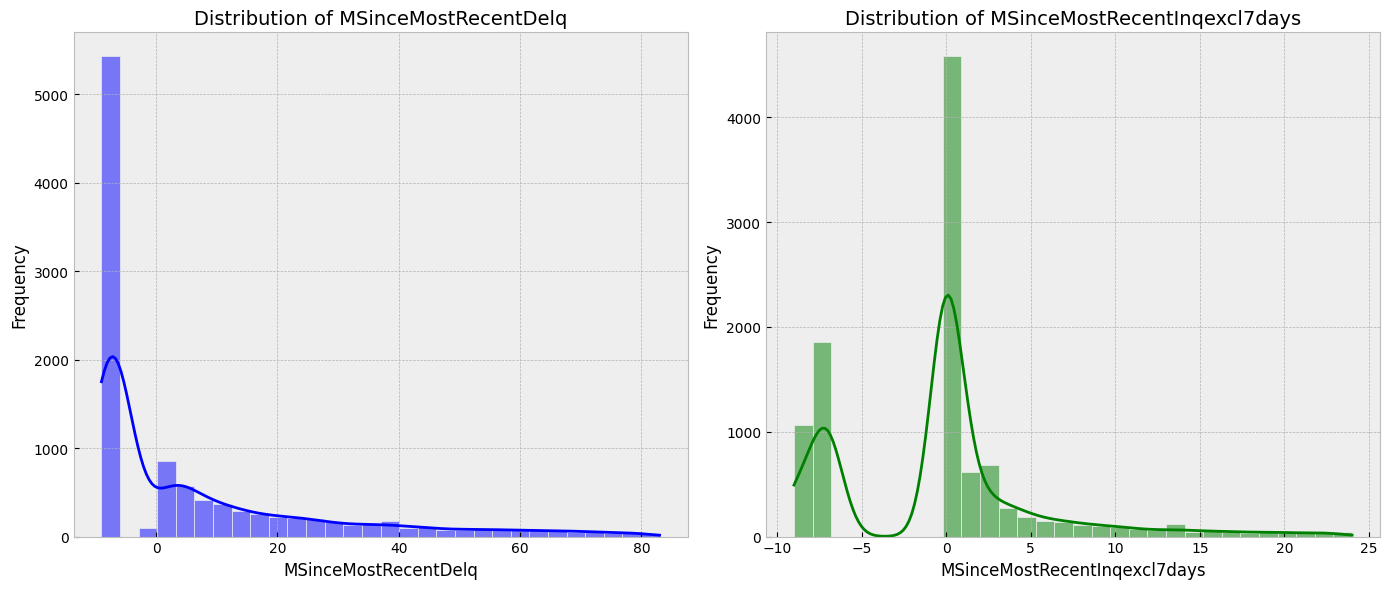

In [20]:
# Set the size of the figure
plt.figure(figsize=(14, 6))

# Plot the distribution of MSinceMostRecentDelq
plt.subplot(1, 2, 1)
sns.histplot(heloc_data['MSinceMostRecentDelq'], bins=30, kde=True, color='blue')
plt.title('Distribution of MSinceMostRecentDelq', fontsize=14)
plt.xlabel('MSinceMostRecentDelq', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Plot the distribution of MSinceMostRecentInqexcl7days
plt.subplot(1, 2, 2)
sns.histplot(heloc_data['MSinceMostRecentInqexcl7days'], bins=30, kde=True, color='green')
plt.title('Distribution of MSinceMostRecentInqexcl7days', fontsize=14)
plt.xlabel('MSinceMostRecentInqexcl7days', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [21]:
# Replace -7 values with the 95th percentile of the respective variable
for column in columns_with_minus_7:
    quantile_95 = heloc_data_copy[column].quantile(0.95)
    heloc_data_copy[column] = heloc_data_copy[column].replace(-7, quantile_95)

# Print the number of occurrences of -7 in the new dataset
print(heloc_data_copy.apply(lambda x: (x == -7).sum()))

RiskPerformance                       0
ExternalRiskEstimate                  0
MSinceOldestTradeOpen                 0
MSinceMostRecentTradeOpen             0
AverageMInFile                        0
NumSatisfactoryTrades                 0
NumTrades60Ever2DerogPubRec           0
NumTrades90Ever2DerogPubRec           0
PercentTradesNeverDelq                0
MSinceMostRecentDelq                  0
MaxDelq2PublicRecLast12M              0
MaxDelqEver                           0
NumTotalTrades                        0
NumTradesOpeninLast12M                0
PercentInstallTrades                  0
MSinceMostRecentInqexcl7days          0
NumInqLast6M                          0
NumInqLast6Mexcl7days                 0
NetFractionRevolvingBurden            0
NetFractionInstallBurden              0
NumRevolvingTradesWBalance            0
NumInstallTradesWBalance              0
NumBank2NatlTradesWHighUtilization    0
PercentTradesWBalance                 0
NoCreditHistory                       0


## Outlier

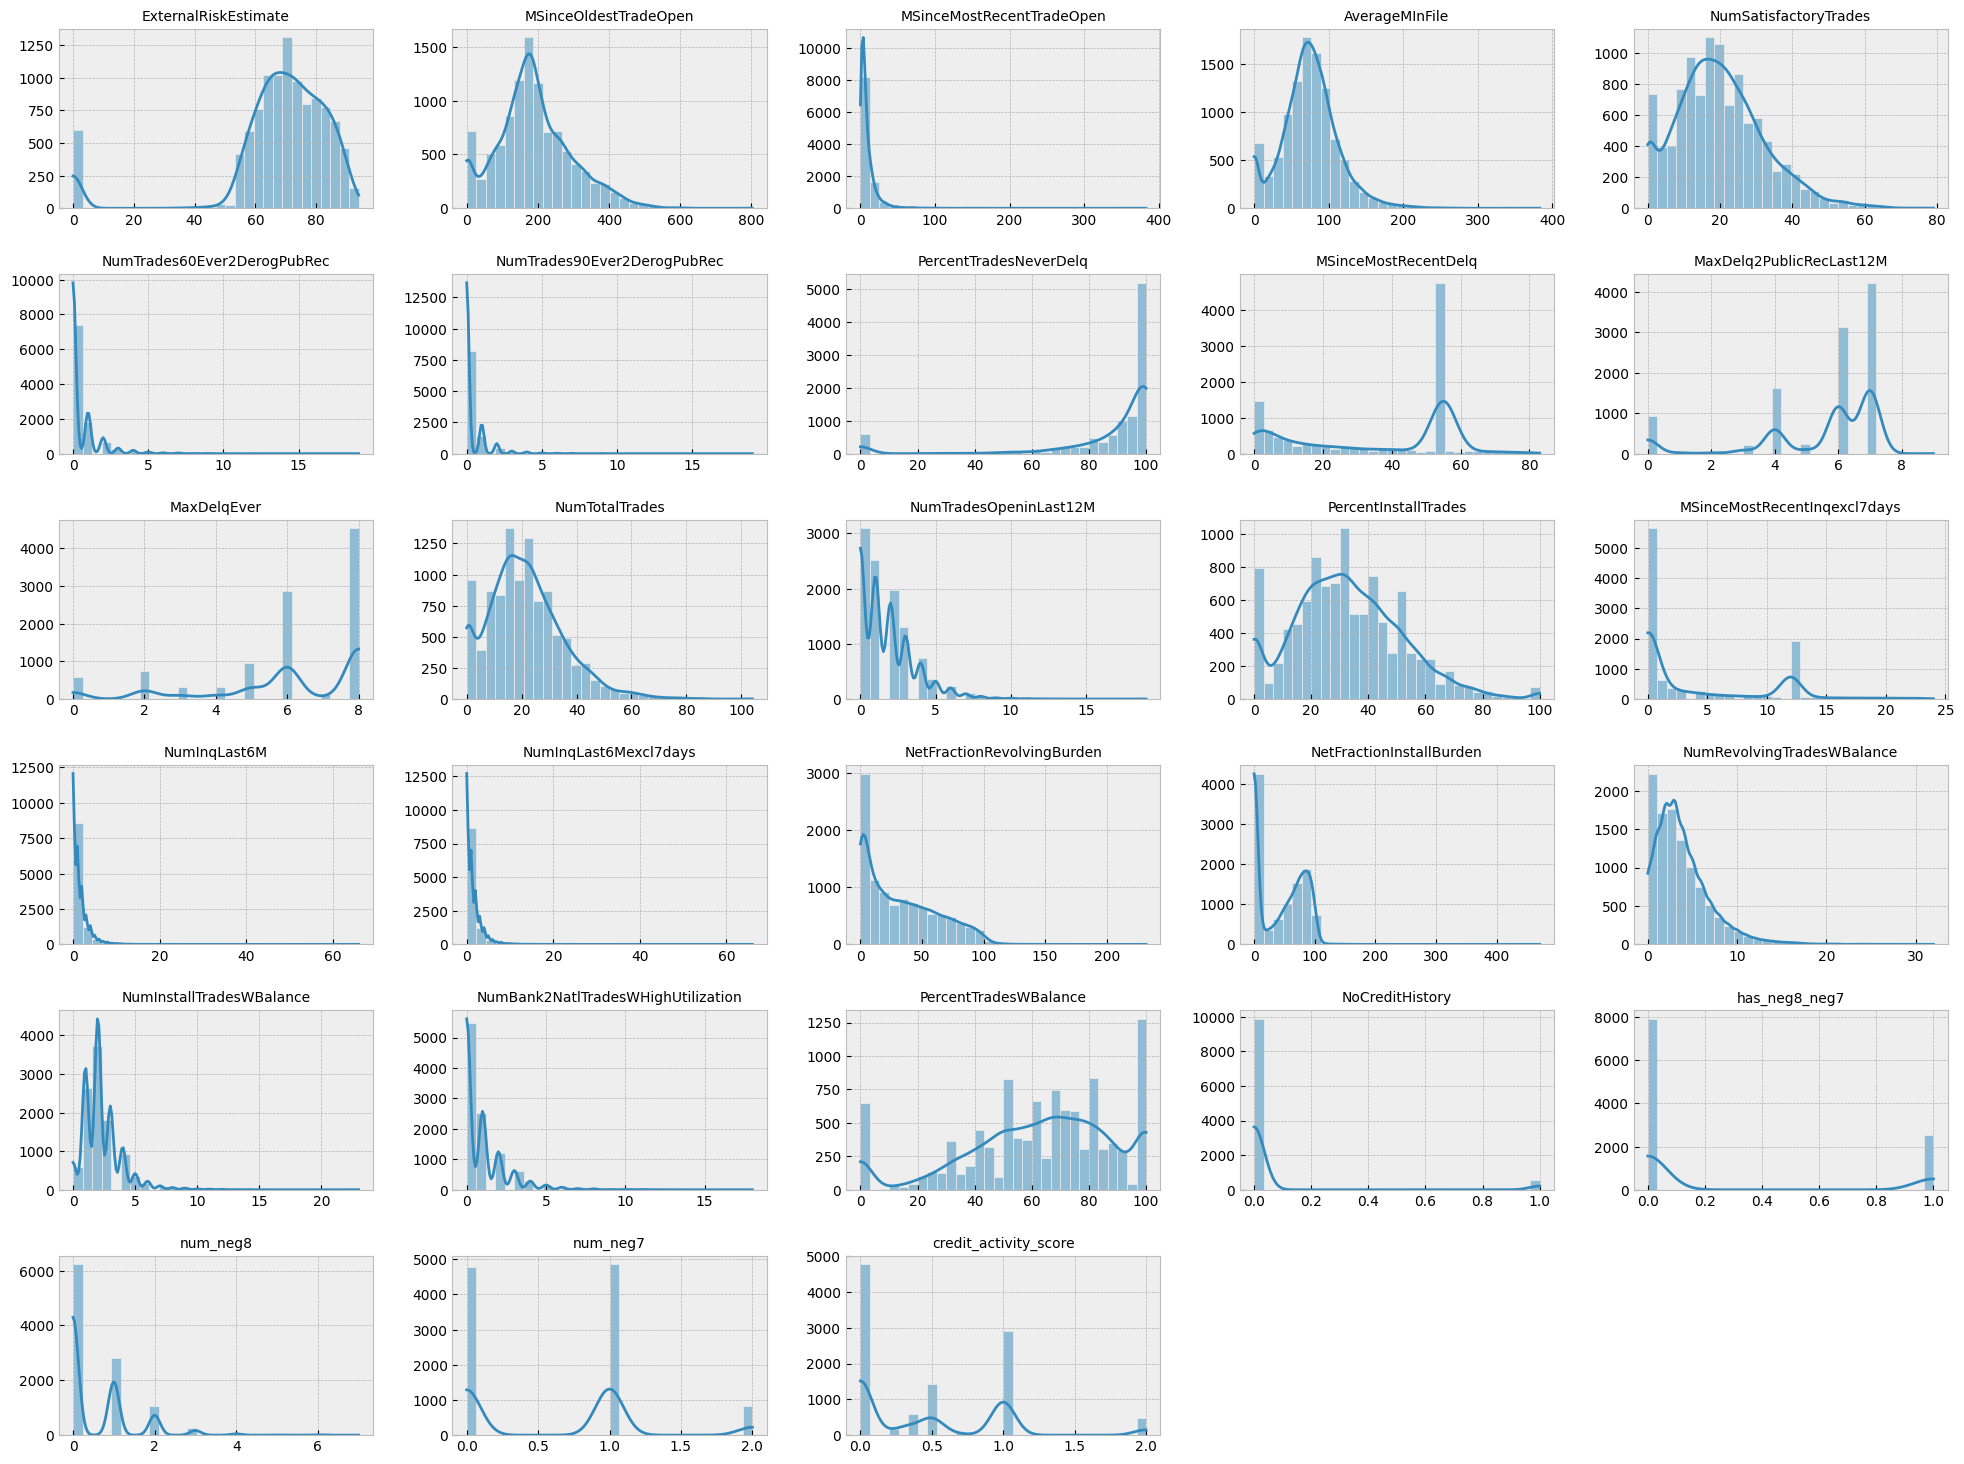

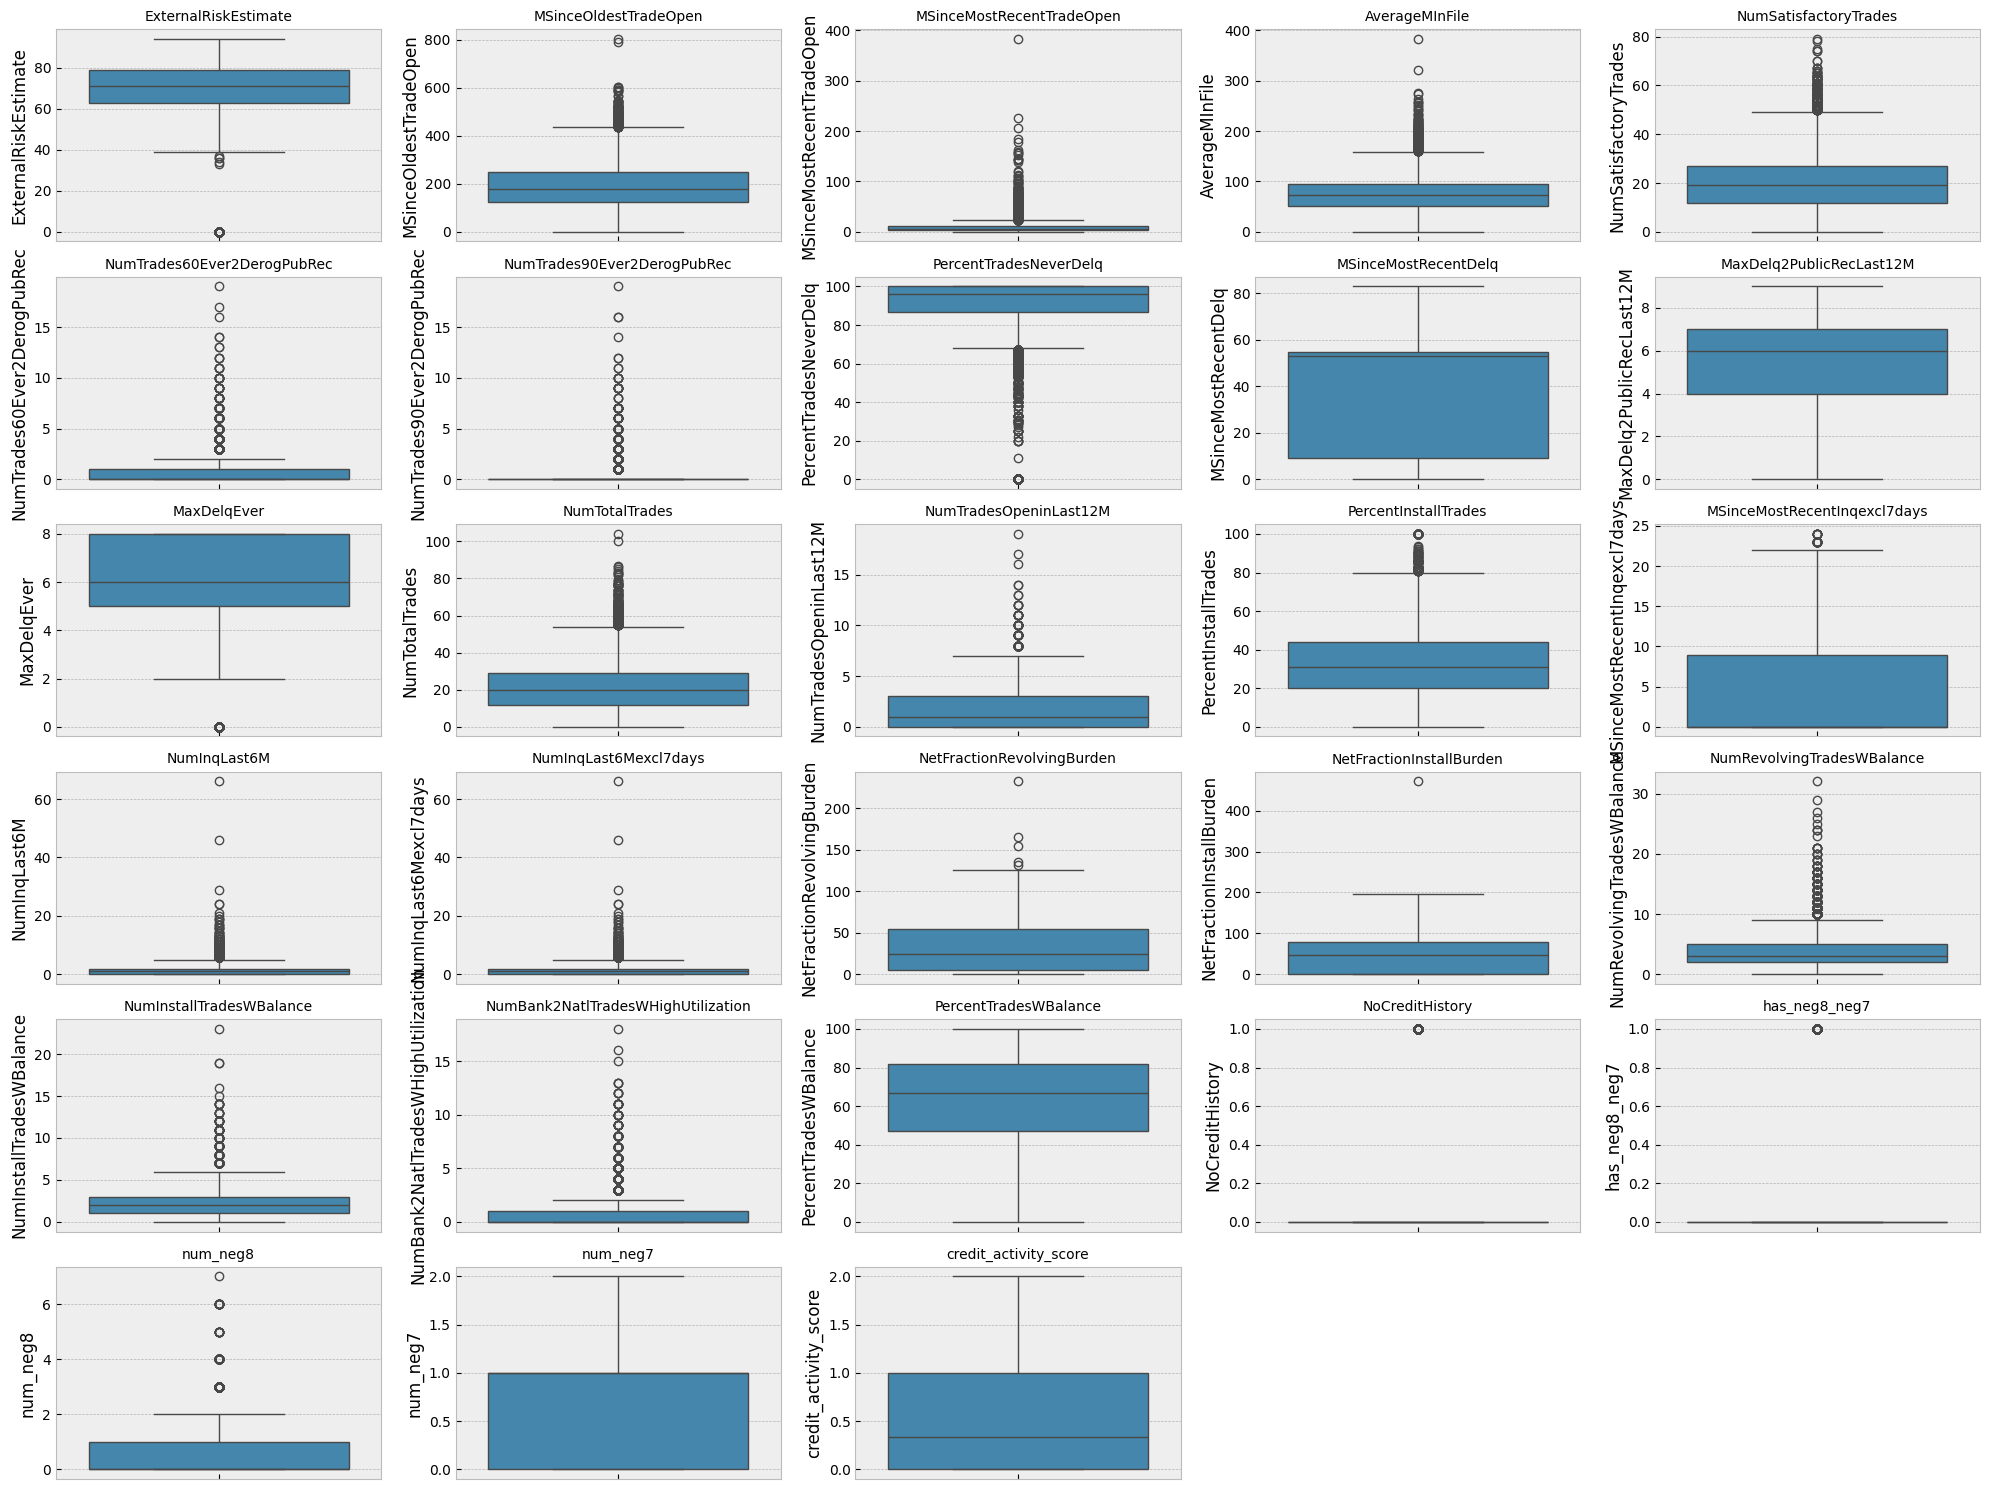

In [22]:
# Plot histograms for all columns except the first one
plt.figure(figsize=(20, 15))
for i, column in enumerate(heloc_data_copy.columns[1:], 1):
    plt.subplot(6, 5, i)
    sns.histplot(heloc_data_copy[column], bins=30, kde=True)
    plt.title(column, fontsize=10)
    plt.xlabel('')
    plt.ylabel('')

# Adjust layout to prevent overlap
plt.tight_layout(pad=2.0)
plt.show()

# Set the size of the figure
plt.figure(figsize=(20, 15))

# Plot boxplots for each column except the first one
for i, column in enumerate(heloc_data_copy.columns[1:], 1):
    plt.subplot(6, 5, i)
    sns.boxplot(y=heloc_data_copy[column])
    plt.title(column, fontsize=10)
    plt.xticks(rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()



The only certain outliers: percentage variables > 100%
- Credit-related percentage variables (PercentTradesNeverDelq, PercentInstallTrades, NetFractionRevolvingBurden, NetFractionInstallBurden) should reasonably be between 0% and 100%.
- However, due to data errors or calculation issues, values exceeding 100% may occur, which is a clear outlier.
- These extreme values have no business significance and should be directly truncated to 100%.



In [23]:
# Clip the specified columns to a maximum value of 100
columns_to_clip = ['PercentTradesNeverDelq', 'PercentInstallTrades', 'NetFractionRevolvingBurden', 'NetFractionInstallBurden']
heloc_data_copy[columns_to_clip] = heloc_data_copy[columns_to_clip].clip(upper=100)

# Display the first few rows to verify the changes
heloc_data_copy.head()

RiskPerformance  ExternalRiskEstimate  MSinceOldestTradeOpen  \
0             Bad                    55                    144   
1             Bad                    61                     58   
2             Bad                    67                     66   
3             Bad                    66                    169   
4             Bad                    81                    333   

   MSinceMostRecentTradeOpen  AverageMInFile  NumSatisfactoryTrades  \
0                          4              84                     20   
1                         15              41                      2   
2                          5              24                      9   
3                          1              73                     28   
4                         27             132                     12   

   NumTrades60Ever2DerogPubRec  NumTrades90Ever2DerogPubRec  \
0                            3                            0   
1                            4                            4   
2                            0                            0   
3                            1                            1   
4                            0                            0   

   PercentTradesNeverDelq  MSinceMostRecentDelq  ...  \
0                      83                     2  ...   
1                     100                    55  ...   
2                     100                    55  ...   
3                      93                    76  ...   
4                     100                    55  ...   

   NetFractionInstallBurden  NumRevolvingTradesWBalance  \
0                         0                           8   
1                         0                           0   
2                        66                           4   
3                        83                           6   
4                        89                           3   

   NumInstallTradesWBalance  NumBank2NatlTradesWHighUtilization  \
0                         1                                   1   
1                         2                                   0   
2                         2                                   1   
3                         4                                   3   
4                         1                                   0   

   PercentTradesWBalance  NoCreditHistory  has_neg8_neg7  num_neg8  num_neg7  \
0                     69                0              0         1         0   
1                      0                0              1         3         1   
2                     86                0              0         0         1   
3                     91                0              0         0         0   
4                     80                0              0         0         1   

   credit_activity_score  
0                   0.00  
1                   0.25  
2                   1.00  
3                   0.00  
4                   1.00  

[5 rows x 29 columns]

## Correlation

In [24]:
# Encode the target variable 'RiskPerformance' to numerical values
heloc_data_copy['RiskPerformance'] = heloc_data_copy['RiskPerformance'].map({'Good': 1, 'Bad': 0})

# Compute the correlation matrix
correlation_matrix = heloc_data_copy.corr()

# Get the correlation values with the target variable 'RiskPerformance'
correlation_with_target = correlation_matrix['RiskPerformance'].sort_values(ascending=False)

# Display the features that have a strong correlation with the target variable
strong_correlation_features = correlation_with_target[abs(correlation_with_target) > 0.1]
print(strong_correlation_features)

RiskPerformance                       1.00
MSinceMostRecentDelq                  0.24
ExternalRiskEstimate                  0.24
AverageMInFile                        0.21
MSinceOldestTradeOpen                 0.19
MaxDelq2PublicRecLast12M              0.19
MaxDelqEver                           0.17
NumSatisfactoryTrades                 0.13
PercentTradesNeverDelq                0.13
has_neg8_neg7                         0.13
num_neg7                              0.12
NumRevolvingTradesWBalance           -0.11
PercentInstallTrades                 -0.12
NumInqLast6Mexcl7days                -0.13
NumTrades90Ever2DerogPubRec          -0.13
NumInqLast6M                         -0.14
NumTrades60Ever2DerogPubRec          -0.16
NumBank2NatlTradesWHighUtilization   -0.21
PercentTradesWBalance                -0.21
NetFractionRevolvingBurden           -0.31
Name: RiskPerformance, dtype: float64


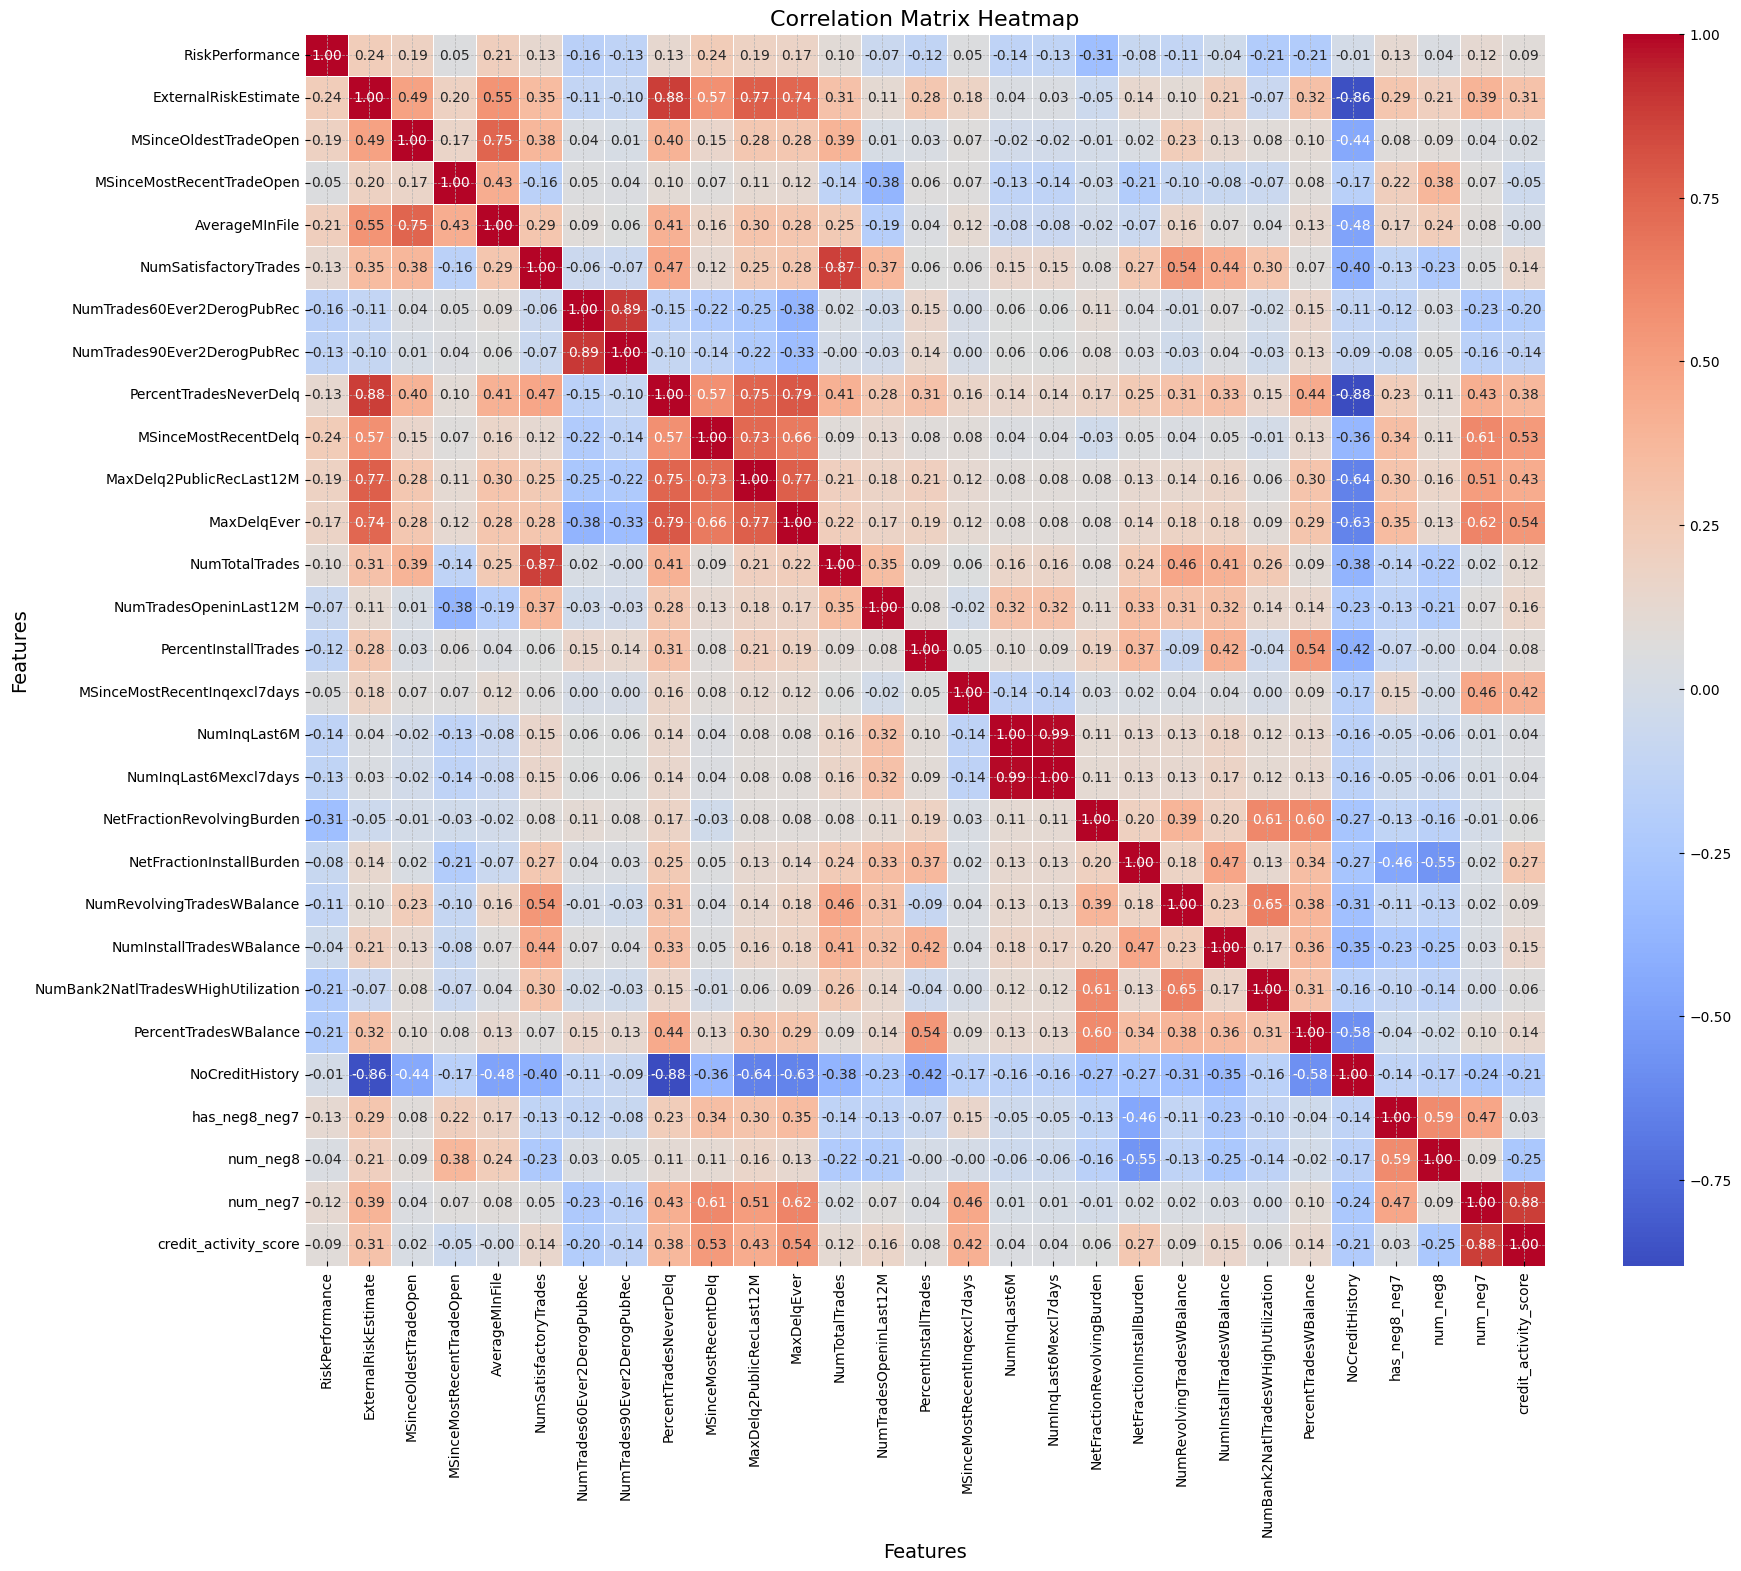

In [25]:
# Set the size of the figure
plt.figure(figsize=(20, 16))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title and labels
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Show the plot
plt.show()

In [26]:
# 找出相关性绝对值大于0.75的组合
high_correlation_pairs = correlation_matrix.unstack().reset_index()
high_correlation_pairs.columns = ['Variable1', 'Variable2', 'Correlation']
high_correlation_pairs = high_correlation_pairs[(abs(high_correlation_pairs['Correlation']) > 0.75) & (high_correlation_pairs['Variable1'] != high_correlation_pairs['Variable2'])]

# 去除重复的组合
high_correlation_pairs['OrderedPair'] = high_correlation_pairs.apply(lambda x: tuple(sorted([x['Variable1'], x['Variable2']])), axis=1)
high_correlation_pairs = high_correlation_pairs.drop_duplicates(subset=['OrderedPair']).drop(columns=['OrderedPair'])

# 显示结果
print(high_correlation_pairs)

                       Variable1                    Variable2  Correlation
37          ExternalRiskEstimate       PercentTradesNeverDelq         0.88
39          ExternalRiskEstimate     MaxDelq2PublicRecLast12M         0.77
53          ExternalRiskEstimate              NoCreditHistory        -0.86
157        NumSatisfactoryTrades               NumTotalTrades         0.87
181  NumTrades60Ever2DerogPubRec  NumTrades90Ever2DerogPubRec         0.89
243       PercentTradesNeverDelq                  MaxDelqEver         0.79
256       PercentTradesNeverDelq              NoCreditHistory        -0.88
301     MaxDelq2PublicRecLast12M                  MaxDelqEver         0.77
481                 NumInqLast6M        NumInqLast6Mexcl7days         0.99
811                     num_neg7        credit_activity_score         0.88


ExternalRiskEstimate is the external credit score, and PercentTradesNeverDelq is the proportion of non-delinquent accounts. We delete PercentTradesNeverDelq because it is highly correlated with ExternalRiskEstimate (0.88), indicating that the credit score already partially includes this information. Deleting PercentTradesNeverDelq will not affect model performance.

Retain MaxDelq2PublicRecLast12M. MaxDelq2PublicRecLast12M may provide additional delinquency information. Even though ExternalRiskEstimate may partially include its information, it is an independent credit risk indicator. Train the model first and check the feature importance of MaxDelq2PublicRecLast12M before deciding whether to delete it.

Delete PercentTradesNeverDelq
- Reason:
- PercentTradesNeverDelq is highly correlated with MaxDelqEver (0.79), indicating that they may express the same information.
- MaxDelqEver represents the most severe delinquency situation of the user, which is more explanatory. Therefore, we can retain MaxDelqEver and delete PercentTradesNeverDelq.

Delete NumSatisfactoryTrades and retain NumTotalTrades
- Reason:
- NumSatisfactoryTrades represents the number of satisfactory trade accounts, but it is almost a subset of NumTotalTrades.
- Directly using NumTotalTrades allows the model to learn the distribution of trade accounts by itself, rather than providing it with redundant variables.

Delete NumTrades60Ever2DerogPubRec and retain NumTrades90Ever2DerogPubRec
- Reason:
- A 90-day delinquency necessarily implies a 60-day delinquency, so NumTrades90Ever2DerogPubRec usually contains the information of NumTrades60Ever2DerogPubRec.
- NumTrades90Ever2DerogPubRec better represents severe credit risk and is more important.

Delete NumInqLast6Mexcl7days
- Reason:
- NumInqLast6Mexcl7days is highly correlated with NumInqLast6M (0.99), and they are almost the same variable.
- NumInqLast6Mexcl7days = NumInqLast6M - inquiries in the past 7 days, but "inquiries in the past 7 days" may not have a significant impact on long-term credit risk.

Delete credit_activity_score and retain num_neg7
- Reason:
- num_neg7 provides more information.

Check the importance of MaxDelq2PublicRecLast12M
- Reason:
- MaxDelq2PublicRecLast12M represents the delinquency situation in the last 12 months, while MaxDelqEver represents the most severe delinquency in a lifetime.
- If MaxDelq2PublicRecLast12M has a low impact on RiskPerformance, it can be deleted.


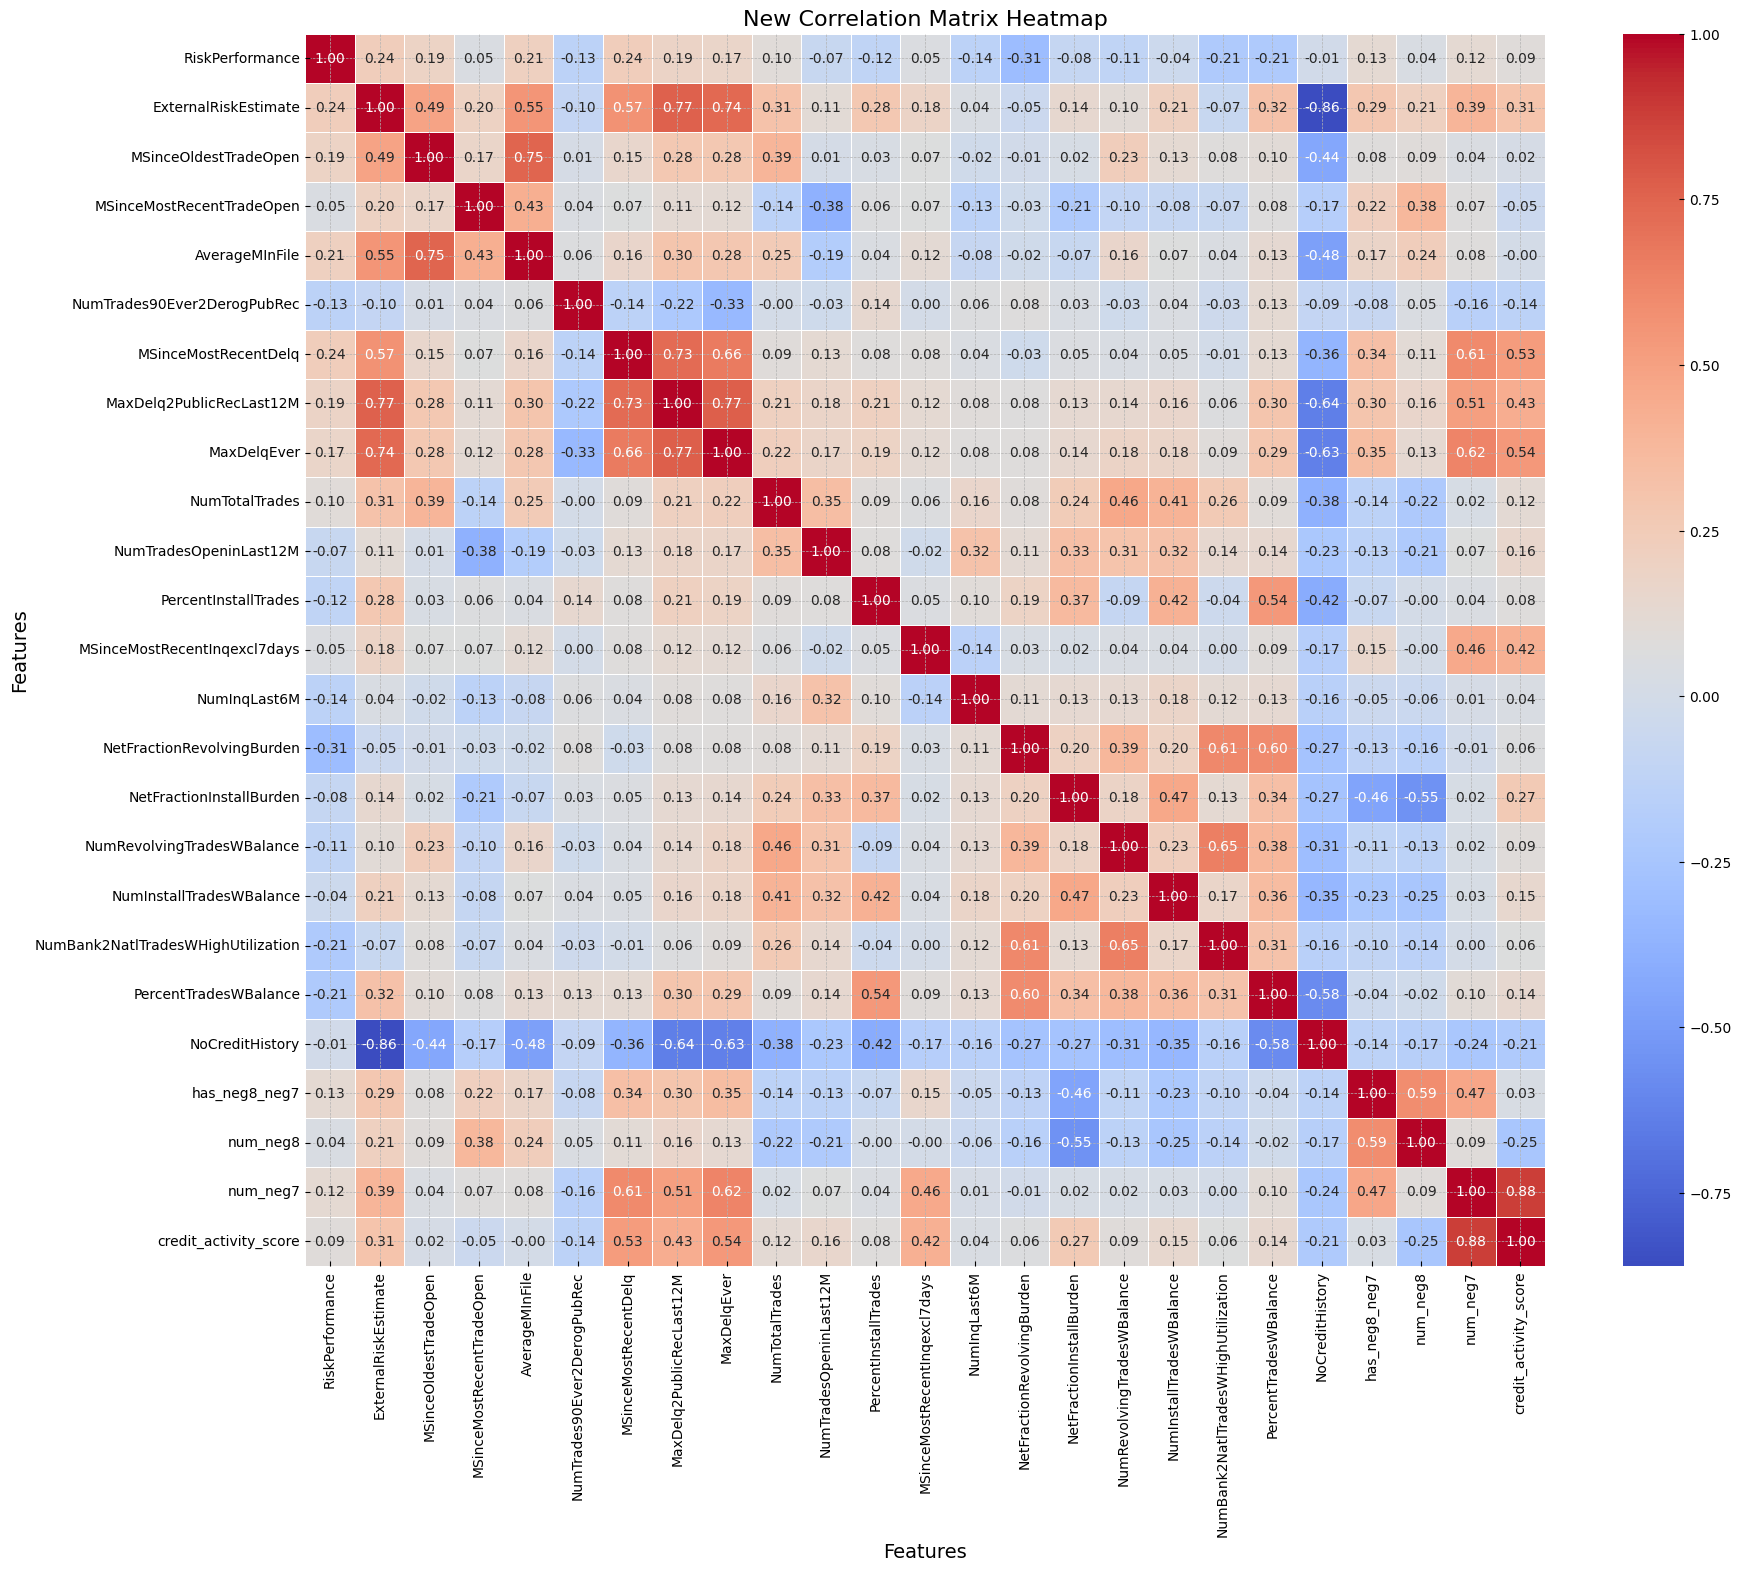

In [27]:
columns_to_drop = ['PercentTradesNeverDelq', 'NumSatisfactoryTrades', 'NumTrades60Ever2DerogPubRec', 'NumInqLast6Mexcl7days']
heloc_data_copy.drop(columns=columns_to_drop, inplace=True)

# Display the first few rows to verify the changes
heloc_data_copy.head()

# Calculate the new correlation matrix
new_correlation_matrix = heloc_data_copy.corr()

# Set the size of the figure
plt.figure(figsize=(20, 16))

# Create a heatmap to visualize the new correlation matrix
sns.heatmap(new_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title and labels
plt.title('New Correlation Matrix Heatmap', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Show the plot
plt.show()


## Feature Engineering 

In [28]:
# Copy heloc_data_copy and rename it
heloc_data_feature_engineering = heloc_data_copy.copy()

# Display the first few rows to verify the changes
heloc_data_feature_engineering.head()

RiskPerformance  ExternalRiskEstimate  MSinceOldestTradeOpen  \
0                0                    55                    144   
1                0                    61                     58   
2                0                    67                     66   
3                0                    66                    169   
4                0                    81                    333   

   MSinceMostRecentTradeOpen  AverageMInFile  NumTrades90Ever2DerogPubRec  \
0                          4              84                            0   
1                         15              41                            4   
2                          5              24                            0   
3                          1              73                            1   
4                         27             132                            0   

   MSinceMostRecentDelq  MaxDelq2PublicRecLast12M  MaxDelqEver  \
0                     2                         3            5   
1                    55                         0            8   
2                    55                         7            8   
3                    76                         6            6   
4                    55                         7            8   

   NumTotalTrades  ...  NetFractionInstallBurden  NumRevolvingTradesWBalance  \
0              23  ...                         0                           8   
1               7  ...                         0                           0   
2               9  ...                        66                           4   
3              30  ...                        83                           6   
4              12  ...                        89                           3   

   NumInstallTradesWBalance  NumBank2NatlTradesWHighUtilization  \
0                         1                                   1   
1                         2                                   0   
2                         2                                   1   
3                         4                                   3   
4                         1                                   0   

   PercentTradesWBalance  NoCreditHistory  has_neg8_neg7  num_neg8  num_neg7  \
0                     69                0              0         1         0   
1                      0                0              1         3         1   
2                     86                0              0         0         1   
3                     91                0              0         0         0   
4                     80                0              0         0         1   

   credit_activity_score  
0                   0.00  
1                   0.25  
2                   1.00  
3                   0.00  
4                   1.00  

[5 rows x 25 columns]

Create `Total_Debt_Burden` to measure the borrower's total repayment pressure.

In [29]:
# Create the new variable Total_Debt_Burden
heloc_data_feature_engineering['Total_Debt_Burden'] = heloc_data_feature_engineering['NetFractionRevolvingBurden'] + heloc_data_feature_engineering['NetFractionInstallBurden']

# Calculate the correlation between the new variable and the target variable
correlation_with_total_debt_burden = heloc_data_feature_engineering[['Total_Debt_Burden', 'RiskPerformance']].corr()

# Display the correlation
print(correlation_with_total_debt_burden)

                   Total_Debt_Burden  RiskPerformance
Total_Debt_Burden               1.00            -0.23
RiskPerformance                -0.23             1.00


Create `Installment_vs_Revolving = NumInstallTradesWBalance / (NumRevolvingTradesWBalance + 1)` to understand whether the user relies more on credit cards or prefers long-term loans.

In [30]:
# Create the new variable Installment_vs_Revolving
heloc_data_feature_engineering['Installment_vs_Revolving'] = heloc_data_feature_engineering['NumInstallTradesWBalance'] / (heloc_data_feature_engineering['NumRevolvingTradesWBalance'] + 1)



Create `Credit_Activity_Index = NumInqLast6M / NumTradesOpeninLast12M` → Frequent inquiries without new accounts may be a high-risk signal

In [31]:
# Create the new variable Credit_Activity_Index
heloc_data_feature_engineering['Credit_Activity_Index'] = heloc_data_feature_engineering['NumInqLast6M'] / (heloc_data_feature_engineering['NumTradesOpeninLast12M'] + 1)

# Display the first few rows to verify the changes
heloc_data_feature_engineering.head()

RiskPerformance  ExternalRiskEstimate  MSinceOldestTradeOpen  \
0                0                    55                    144   
1                0                    61                     58   
2                0                    67                     66   
3                0                    66                    169   
4                0                    81                    333   

   MSinceMostRecentTradeOpen  AverageMInFile  NumTrades90Ever2DerogPubRec  \
0                          4              84                            0   
1                         15              41                            4   
2                          5              24                            0   
3                          1              73                            1   
4                         27             132                            0   

   MSinceMostRecentDelq  MaxDelq2PublicRecLast12M  MaxDelqEver  \
0                     2                         3            5   
1                    55                         0            8   
2                    55                         7            8   
3                    76                         6            6   
4                    55                         7            8   

   NumTotalTrades  ...  NumBank2NatlTradesWHighUtilization  \
0              23  ...                                   1   
1               7  ...                                   0   
2               9  ...                                   1   
3              30  ...                                   3   
4              12  ...                                   0   

   PercentTradesWBalance  NoCreditHistory  has_neg8_neg7  num_neg8  num_neg7  \
0                     69                0              0         1         0   
1                      0                0              1         3         1   
2                     86                0              0         0         1   
3                     91                0              0         0         0   
4                     80                0              0         0         1   

   credit_activity_score  Total_Debt_Burden  Installment_vs_Revolving  \
0                   0.00                 33                      0.11   
1                   0.25                  0                      2.00   
2                   1.00                119                      0.40   
3                   0.00                155                      0.57   
4                   1.00                140                      0.25   

   Credit_Activity_Index  
0                   0.00  
1                   0.00  
2                   0.80  
3                   1.25  
4                   1.00  

[5 rows x 28 columns]

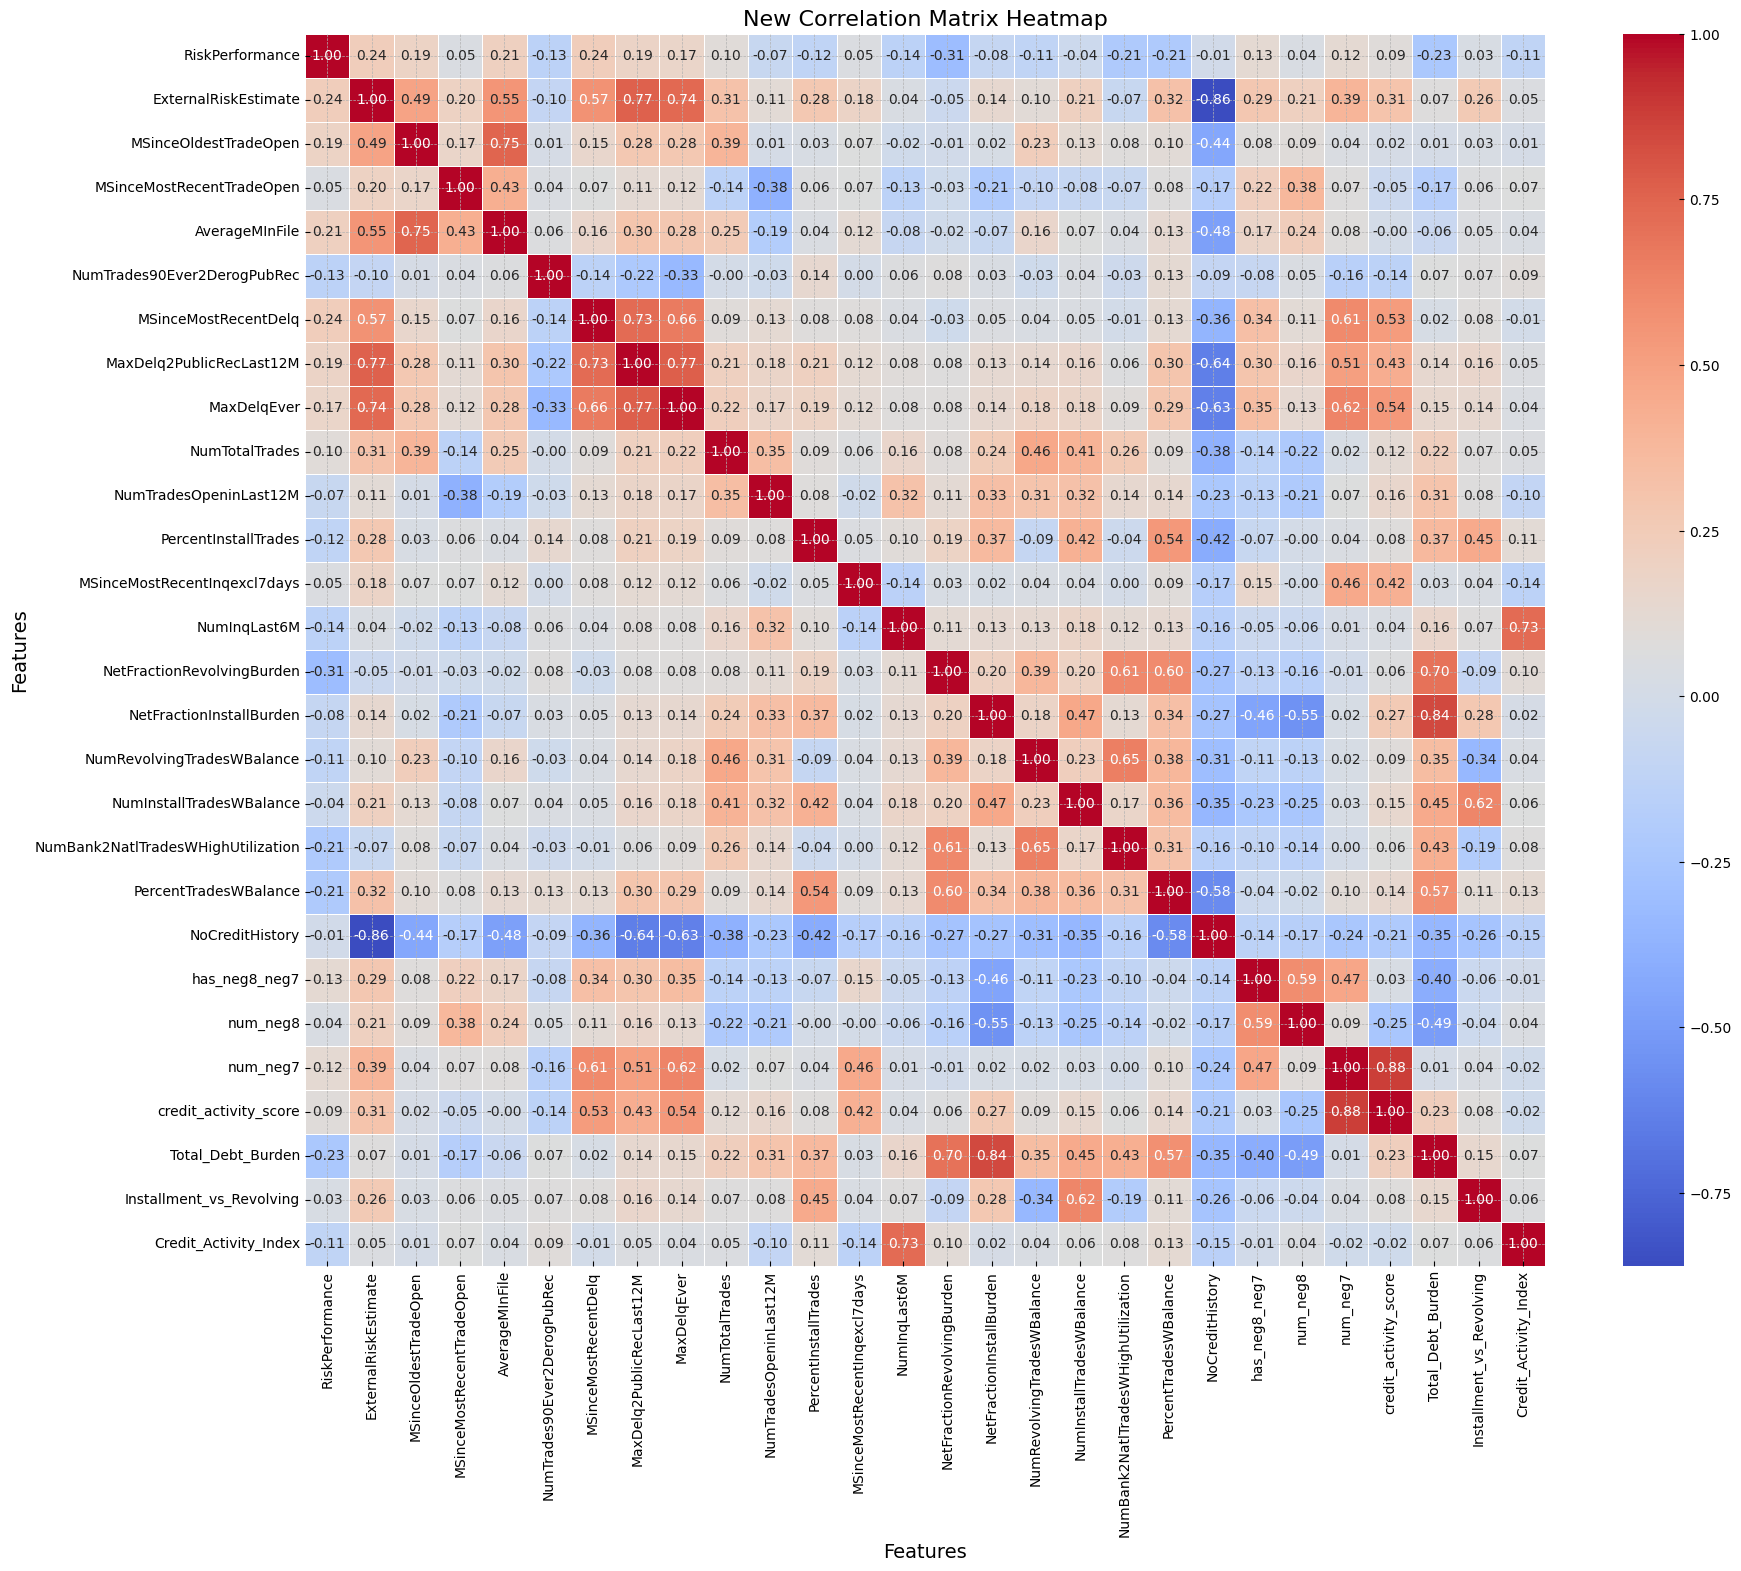

In [32]:
# Calculate the new correlation matrix
new_correlation_matrix = heloc_data_feature_engineering.corr()

# Set the size of the figure
plt.figure(figsize=(20, 16))

# Create a heatmap to visualize the new correlation matrix
sns.heatmap(new_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title and labels
plt.title('New Correlation Matrix Heatmap', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Show the plot
plt.show()

## Training Model

Split the dataset into train (training set), val (validation set), and test (test set), then:
1. Train different models on the train set.
2. Tune hyperparameters on the val set and select the best model.
3. Perform final validation on the test set to evaluate the model's generalization ability.

Use 70% for training, 15% for validation, and 15% for testing.

In [ ]:
from sklearn.model_selection import train_test_split

X = heloc_data_feature_engineering.drop(columns=['RiskPerformance'])
y = heloc_data_feature_engineering['RiskPerformance']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f'Training set size: {X_train.shape[0]}')
print(f'Validation set size: {X_val.shape[0]}')
print(f'Test set size: {X_test.shape[0]}')

Training set size: 7321
Validation set size: 1569
Test set size: 1569


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score

log_reg = LogisticRegression(max_iter=1000, random_state=42)

log_reg.fit(X_train, y_train)

y_val_pred_proba = log_reg.predict_proba(X_val)[:, 1]
y_val_pred = log_reg.predict(X_val)

auc = roc_auc_score(y_val, y_val_pred_proba)
print(f'Validation AUC: {auc:.4f}')

accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy:.4f}')

Validation AUC: 0.7841
Validation Accuracy: 0.7055


/Users/jiawei/Downloads/MSM_532/Streamlit/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=42)

decision_tree.fit(X_train, y_train)

y_val_pred_proba_dt = decision_tree.predict_proba(X_val)[:, 1]
y_val_pred_dt = decision_tree.predict(X_val)

auc_dt = roc_auc_score(y_val, y_val_pred_proba_dt)
print(f'Validation AUC (Decision Tree): {auc_dt:.4f}')

accuracy_dt = accuracy_score(y_val, y_val_pred_dt)
print(f'Validation Accuracy (Decision Tree): {accuracy_dt:.4f}')

Validation AUC (Decision Tree): 0.6213
Validation Accuracy (Decision Tree): 0.6157


In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=42, n_estimators=100)

random_forest.fit(X_train, y_train)

y_val_pred_proba_rf = random_forest.predict_proba(X_val)[:, 1]
y_val_pred_rf = random_forest.predict(X_val)

auc_rf = roc_auc_score(y_val, y_val_pred_proba_rf)
print(f'Validation AUC (Random Forest): {auc_rf:.4f}')

accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
print(f'Validation Accuracy (Random Forest): {accuracy_rf:.4f}')

Validation AUC (Random Forest): 0.7797
Validation Accuracy (Random Forest): 0.7081


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

xgb_model.fit(X_train, y_train)

y_val_pred_proba_xgb = xgb_model.predict_proba(X_val)[:, 1]
y_val_pred_xgb = xgb_model.predict(X_val)

auc_xgb = roc_auc_score(y_val, y_val_pred_proba_xgb)
print(f'Validation AUC (XGBoost): {auc_xgb:.4f}')

accuracy_xgb = accuracy_score(y_val, y_val_pred_xgb)
print(f'Validation Accuracy (XGBoost): {accuracy_xgb:.4f}')

Validation AUC (XGBoost): 0.7710
Validation Accuracy (XGBoost): 0.7062


/Users/jiawei/Downloads/MSM_532/Streamlit/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [18:16:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, accuracy_score

lgb_model = lgb.LGBMClassifier(random_state=42)

lgb_model.fit(X_train, y_train)

y_val_pred_proba_lgb = lgb_model.predict_proba(X_val)[:, 1]
y_val_pred_lgb = lgb_model.predict(X_val)

auc_lgb = roc_auc_score(y_val, y_val_pred_proba_lgb)
print(f'Validation AUC (LightGBM): {auc_lgb:.4f}')

accuracy_lgb = accuracy_score(y_val, y_val_pred_lgb)
print(f'Validation Accuracy (LightGBM): {accuracy_lgb:.4f}')

[LightGBM] [Info] Number of positive: 3500, number of negative: 3821
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1628
[LightGBM] [Info] Number of data points in the train set: 7321, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.478077 -> initscore=-0.087749
[LightGBM] [Info] Start training from score -0.087749
Validation AUC (LightGBM): 0.7785
Validation Accuracy (LightGBM): 0.7081


 ## Hyperparameter Tuning  


In [ ]:
# Wider range of parameter search
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

param_grid = {
    'C': np.logspace(-3, 3, 100),  # 100 values from 0.001 to 1000
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Initialize the model (log_reg is defined in other cells, no conflict)
log_reg = LogisticRegression(max_iter=1000, random_state=42)

grid_search = GridSearchCV(estimator=log_reg,
                           param_grid=param_grid,
                           cv=5,
                           scoring='roc_auc',
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train, y_train)

# Output the best parameters and the AUC of the best model
print(f'Best parameters: {grid_search.best_params_}')
best_model = grid_search.best_estimator_

y_val_pred_proba = best_model.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_val_pred_proba)
print(f'Validation AUC: {auc:.4f}')

accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy:.4f}')



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score


# Define an extended parameter grid to try a larger search range
param_grid_dt = {
    'max_depth': [None] + list(range(3, 21, 2)),  # Try all odd depths between 3 and 20, and no depth limit
    'min_samples_split': [2, 5, 10, 20],          # Try more minimum samples for splitting
    'min_samples_leaf': [1, 2, 3, 5, 10],         # Try more minimum samples for leaf nodes
    'max_features': [None, 'sqrt', 'log2']        # Different maximum feature selection strategies
}

# Initialize the decision tree model with a consistent random seed
dt = DecisionTreeClassifier(random_state=42)

# Use GridSearchCV for parameter tuning, scoring specified as roc_auc, using 5-fold cross-validation
grid_search_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid_dt,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Perform parameter tuning on the training set
grid_search_dt.fit(X_train, y_train)

# Output the best parameter combination
print("Best parameters:", grid_search_dt.best_params_)

# Use the best model to make predictions on the validation set
best_dt = grid_search_dt.best_estimator_
y_val_pred_proba_dt = best_dt.predict_proba(X_val)[:, 1]
auc_dt = roc_auc_score(y_val, y_val_pred_proba_dt)
print(f"Validation AUC after tuning Decision Tree: {auc_dt:.4f}")
accuracy_rf_tuned = accuracy_score(y_val, y_val_pred_rf)
print(f'Validation Accuracy (Tuned RandomForest): {accuracy_rf_tuned:.4f}')

Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Best parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 10}
Validation AUC after tuning Decision Tree: 0.7575
Validation Accuracy (Tuned RandomForest): 0.7183


In [ ]:
# Define the parameter grid for RandomForest hyperparameter tuning
param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["auto", "sqrt", "log2"]
}

# Use GridSearchCV for hyperparameter tuning of the RandomForest model

# Initialize the RandomForest model (set random seed)
rf = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(estimator=rf,
                              param_grid=param_grid_rf,
                              scoring='roc_auc',
                              cv=5,
                              n_jobs=-1,
                              verbose=1)

# Tune hyperparameters on the training set
grid_search_rf.fit(X_train, y_train)

# Print the best parameter combination
print("Best parameters for RandomForest:", grid_search_rf.best_params_)

# Use the best model to make predictions on the validation set
best_rf = grid_search_rf.best_estimator_
y_val_pred_proba_rf = best_rf.predict_proba(X_val)[:, 1]
y_val_pred_rf = best_rf.predict(X_val)

# Compute the AUC
auc_rf_tuned = roc_auc_score(y_val, y_val_pred_proba_rf)
print(f'Validation AUC (Tuned RandomForest): {auc_rf_tuned:.4f}')

# Compute accuracy
accuracy_rf_tuned = accuracy_score(y_val, y_val_pred_rf)
print(f'Validation Accuracy (Tuned RandomForest): {accuracy_rf_tuned:.4f}')

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/Users/jiawei/Downloads/MSM_532/Streamlit/venv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/jiawei/Downloads/MSM_532/Streamlit/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
320 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jiawei/Downloads/MSM_532/Streamlit/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    es

Best parameters for RandomForest: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Validation AUC (Tuned RandomForest): 0.7890
Validation Accuracy (Tuned RandomForest): 0.7183


In [ ]:
param_grid_lgb = {
    'num_leaves': [20, 31, 40],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200]
}

# Initialize the LightGBM model (set random seed)
lgbm = lgb.LGBMClassifier(random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search_lgb = GridSearchCV(estimator=lgbm,
                               param_grid=param_grid_lgb,
                               scoring='roc_auc',
                               cv=5,
                               n_jobs=-1,
                               verbose=1)

# Perform hyperparameter tuning on the training set
grid_search_lgb.fit(X_train, y_train)

# Print the best parameters
print("Best parameters for LightGBM:", grid_search_lgb.best_params_)

# Use the best model to make predictions on the validation set
best_lgb = grid_search_lgb.best_estimator_
y_val_pred_proba_lgb = best_lgb.predict_proba(X_val)[:, 1]
y_val_pred_lgb = best_lgb.predict(X_val)

# Calculate AUC and accuracy
auc_lgb_tuned = roc_auc_score(y_val, y_val_pred_proba_lgb)
accuracy_lgb_tuned = accuracy_score(y_val, y_val_pred_lgb)

print(f"Validation AUC (LightGBM tuned): {auc_lgb_tuned:.4f}")
print(f"Validation Accuracy (LightGBM tuned): {accuracy_lgb_tuned:.4f}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Info] Number of positive: 2800, number of negative: 3056
[LightGBM] [Info] Number of positive: 2800, number of negative: 3057[LightGBM] [Info] Number of positive: 2800, number of negative: 3057

[LightGBM] [Info] Number of positive: 2800, number of negative: 3057
[LightGBM] [Info] Number of positive: 2800, number of negative: 3057
[LightGBM] [Info] Number of positive: 2800, number of negative: 3057
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006041 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1587
[LightGBM] [Info] Number of positive: 2800, number of negative: 3056
[LightGBM] [Info] Number of data points in the train set: 5856, number of used features: 27
[LightGBM] [Info] Number of positive: 2800, number of negative: 3057
[LightGBM] [Info] Auto-choosing ro

In [52]:
from sklearn.metrics import roc_auc_score, accuracy_score

# Logistic Regression
y_test_pred_proba_log_reg = best_model.predict_proba(X_test)[:, 1]
y_test_pred_log_reg = best_model.predict(X_test)
auc_log_reg = roc_auc_score(y_test, y_test_pred_proba_log_reg)
accuracy_log_reg = accuracy_score(y_test, y_test_pred_log_reg)
print(f'Test AUC (Logistic Regression): {auc_log_reg:.4f}')
print(f'Test Accuracy (Logistic Regression): {accuracy_log_reg:.4f}')

# Decision Tree
y_test_pred_proba_dt = best_dt.predict_proba(X_test)[:, 1]
y_test_pred_dt = best_dt.predict(X_test)
auc_dt = roc_auc_score(y_test, y_test_pred_proba_dt)
accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
print(f'Test AUC (Decision Tree): {auc_dt:.4f}')
print(f'Test Accuracy (Decision Tree): {accuracy_dt:.4f}')

# Random Forest
y_test_pred_proba_rf = best_rf.predict_proba(X_test)[:, 1]
y_test_pred_rf = best_rf.predict(X_test)
auc_rf = roc_auc_score(y_test, y_test_pred_proba_rf)
accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print(f'Test AUC (Random Forest): {auc_rf:.4f}')
print(f'Test Accuracy (Random Forest): {accuracy_rf:.4f}')

# LightGBM
y_test_pred_proba_lgb = best_lgb.predict_proba(X_test)[:, 1]
y_test_pred_lgb = best_lgb.predict(X_test)
auc_lgb = roc_auc_score(y_test, y_test_pred_proba_lgb)
accuracy_lgb = accuracy_score(y_test, y_test_pred_lgb)
print(f'Test AUC (LightGBM): {auc_lgb:.4f}')
print(f'Test Accuracy (LightGBM): {accuracy_lgb:.4f}')

Test AUC (Logistic Regression): 0.7913
Test Accuracy (Logistic Regression): 0.7228
Test AUC (Decision Tree): 0.7592
Test Accuracy (Decision Tree): 0.7100
Test AUC (Random Forest): 0.7943
Test Accuracy (Random Forest): 0.7157
Test AUC (LightGBM): 0.7958
Test Accuracy (LightGBM): 0.7247


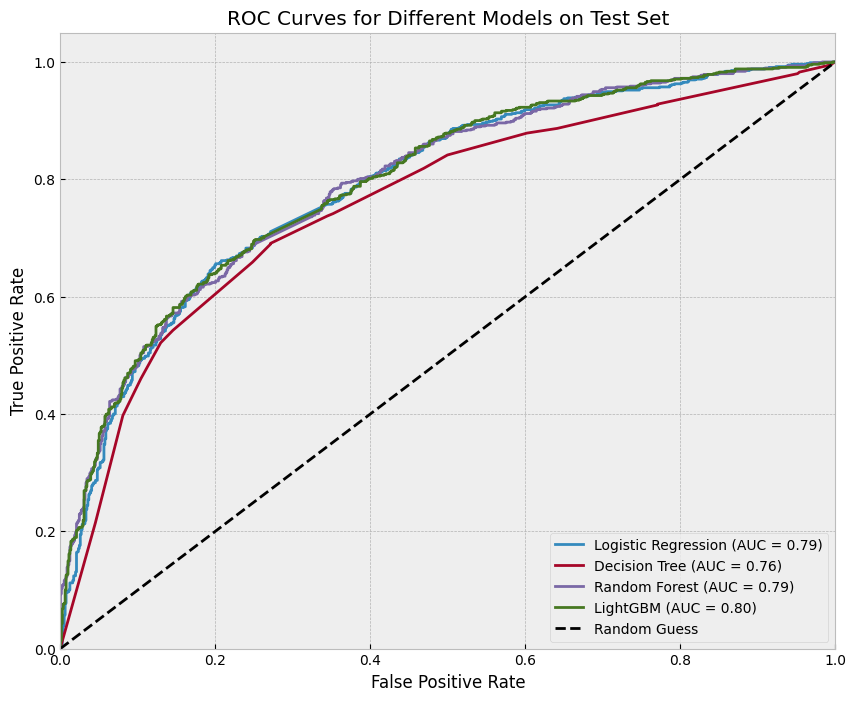

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate the fpr and tpr values for each model
fpr_log, tpr_log, _ = roc_curve(y_test, y_test_pred_proba_log_reg)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_test_pred_proba_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_test_pred_proba_rf)
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_test_pred_proba_lgb)

# Calculate each model's AUC score
auc_log = auc(fpr_log, tpr_log)
auc_dt = auc(fpr_dt, tpr_dt)
auc_rf = auc(fpr_rf, tpr_rf)
auc_lgb = auc(fpr_lgb, tpr_lgb)

# Plot the ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_lgb, tpr_lgb, label=f'LightGBM (AUC = {auc_lgb:.2f})')

# Plot the diagonal line representing a random guess model
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models on Test Set')
plt.legend(loc='lower right')
plt.show()

In [55]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Logistic Regression
precision_log_reg = precision_score(y_test, y_test_pred_log_reg)
recall_log_reg = recall_score(y_test, y_test_pred_log_reg)
f1_log_reg = f1_score(y_test, y_test_pred_log_reg)
auc_log_reg = roc_auc_score(y_test, y_test_pred_proba_log_reg)

print(f'Logistic Regression - Precision: {precision_log_reg:.4f}, Recall: {recall_log_reg:.4f}, F1 Score: {f1_log_reg:.4f}, AUC: {auc_log_reg:.4f}')

# Decision Tree
precision_dt = precision_score(y_test, y_test_pred_dt)
recall_dt = recall_score(y_test, y_test_pred_dt)
f1_dt = f1_score(y_test, y_test_pred_dt)
auc_dt = roc_auc_score(y_test, y_test_pred_proba_dt)

print(f'Decision Tree - Precision: {precision_dt:.4f}, Recall: {recall_dt:.4f}, F1 Score: {f1_dt:.4f}, AUC: {auc_dt:.4f}')

# Random Forest
precision_rf = precision_score(y_test, y_test_pred_rf)
recall_rf = recall_score(y_test, y_test_pred_rf)
f1_rf = f1_score(y_test, y_test_pred_rf)
auc_rf = roc_auc_score(y_test, y_test_pred_proba_rf)

print(f'Random Forest - Precision: {precision_rf:.4f}, Recall: {recall_rf:.4f}, F1 Score: {f1_rf:.4f}, AUC: {auc_rf:.4f}')

# LightGBM
precision_lgb = precision_score(y_test, y_test_pred_lgb)
recall_lgb = recall_score(y_test, y_test_pred_lgb)
f1_lgb = f1_score(y_test, y_test_pred_lgb)
auc_lgb = roc_auc_score(y_test, y_test_pred_proba_lgb)

print(f'LightGBM - Precision: {precision_lgb:.4f}, Recall: {recall_lgb:.4f}, F1 Score: {f1_lgb:.4f}, AUC: {auc_lgb:.4f}')

Logistic Regression - Precision: 0.7299, Recall: 0.6667, F1 Score: 0.6969, AUC: 0.7913
Decision Tree - Precision: 0.6996, Recall: 0.6893, F1 Score: 0.6944, AUC: 0.7592
Random Forest - Precision: 0.7324, Recall: 0.6387, F1 Score: 0.6823, AUC: 0.7943
LightGBM - Precision: 0.7366, Recall: 0.6600, F1 Score: 0.6962, AUC: 0.7958
